# <font color = 'Redblue'> **Análise Exploratória**</font> $→$ <font color = 'GREY'> **Titanic**</font>

### **Contexto**:

- O naufrágio do Titanic é um dos eventos mais conhecidos do mundo.

### **O objetivo principal**:

-  É analisar os principais fatores ou identificar os principais grupos de passageiros com maior chance de sobrevivência tendo em vista as características demográficas e sociais presentes na base de dados.

### **Problema de Negócio**
- Crie um modelo de Machine Learning capaz de responder à seguinte questão:

  -  Que grupos de pessoas poderão ter mais condições de sobreviver ao naufrágio?"



## *Descrição das Variáveis*

- **PassengerId** $→$Indetificador único do  passageiro  na viagem;

- **Survived** $→$ é a variável alvo $(Target)$, que indica a sobrevivência do passageiro, isto é:
   - $1 →$ *Indica que o passageiro sobreviveu*
   - $0→$ *Indica que o passageiro não sobreviveu*

- **Pclass** $→$ Representa a classe social do passageiro, isto é:
   - $1→$ Classe Alta
   - $2→$ Classe Média
   - $3→$ Classe Baixa

- **Name** $→$ Indica o Nome do passageiro;

- **Sex** $→$ Indica o Sexo/gênero do passageiro;

- **Age** $→$ Indica a Idade do passageiro;

- **SibSp** Inica o total de irmãos/cônjuges do passageiro a bordo do navio;

- **Parch** $→$ Total de pais/filhos do passageiro a bordo do navio;

- **Ticket** $→$ Número de referência do bilhete do passageiro;

- **Fare** $→$ Valor pago pelo passageiro na compra da passagem;

- **Cabin** $→$ Número de referência da cabine em que está o passageiro;

- **Embarked** $→$ Indica o local/porto de embarque:

   - $C→$ *Cherbourg*
   - $Q →$ *Queenstown*
   - $S →$ *Southampton*

## **Bibliotecas**

In [ ]:
!pip install xplotter --upgrade
!pip install mlcomposer --upgrade

In [ ]:
# Project libraries
import pandas as pd
import os
from warnings import filterwarnings
filterwarnings('ignore')

## **Lendo os Dados**

In [ ]:
# Reading training data
df = pd.read_csv('Titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Name          891 non-null    object  
 4   Sex           891 non-null    object  
 5   Age           714 non-null    float64 
 6   SibSp         891 non-null    int64   
 7   Parch         891 non-null    int64   
 8   Ticket        891 non-null    object  
 9   Fare          891 non-null    float64 
 10  Cabin         204 non-null    object  
 11  Embarked      889 non-null    object  
 12  name_title    891 non-null    object  
 13  ticket_class  891 non-null    object  
 14  cabin_class   204 non-null    object  
 15  name_length   891 non-null    int64   
 16  age_cat       714 non-null    category
 17  fare_cat      876 non-null    category
 18  family_siz

In [ ]:
df.dtypes

PassengerId        int64
Survived           int64
Pclass             int64
Name              object
Sex               object
Age              float64
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Cabin             object
Embarked          object
name_title        object
ticket_class      object
cabin_class       object
name_length        int64
age_cat         category
fare_cat        category
family_size        int64
dtype: object

In [ ]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
name_title        0
ticket_class      0
cabin_class     687
name_length       0
age_cat         177
fare_cat         15
family_size       0
dtype: int64

## $EDA→$ **Análise Exploratória**

- A partir deste momento, será proposta uma verdadeira varredura dos dados para a aplicação de uma análise descritiva detalhada a fim de colher insights relevantes para o contexto empresarial.

- Iremos utilizar o Pacote/Biblioteca $xplotter$, para facilitar o trabalho de exploratória de dados a fim de gerarmos **insights** valiosos.

In [ ]:
# Importing libraries
from xplotter.insights import *

#### **Calculando a Taxa de Sobrevivência**

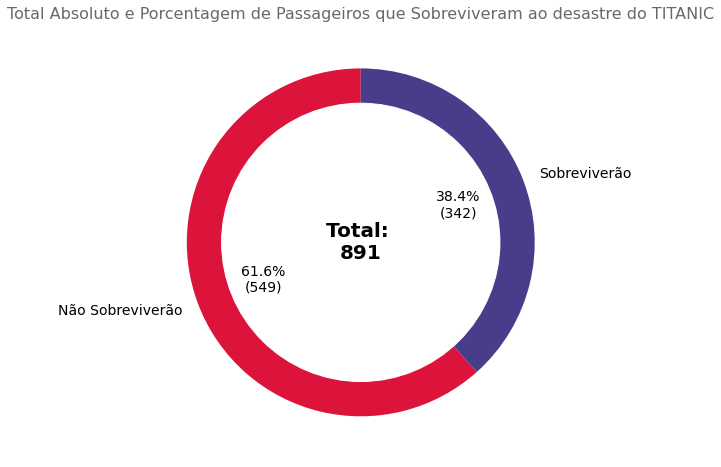

In [ ]:
# Taxa de Sobrevivência
survived_map = {1: 'Sobreviverão', 0: 'Não Sobreviverão'}
survived_colors = ['crimson', 'darkslateblue']
plot_donut_chart(df=df, col='Survived', label_names=survived_map, colors=survived_colors,
                 title='Total Absoluto e Porcentagem de Passageiros que Sobreviveram ao desastre do TITANIC', fontsize = 30)

**Conclusões**:

- O gráfico acima mostra claramente que temos uma proporção de sobreviventes e vítimas de $891$ passageiros e tripulantes presentes no banco de dados disponível para análise.

- Nele é possível perceber um maior número de vítimas do naufrágio, totalizando $549$ passageiros ou $61,6$% do total.

- O menor número de sobreviventes soma $342$ passageiros ou $38,4$% do total.

## <font color = 'Blue'> **Análisando da Influência na variável Sexo**</font>

#### **Análise do Sexo/Gênero**

- A partir da análise de sobrevivência realizada acima, é possível ampliar as visualizações utilizando outras variáveis presentes na base.

- Agora, vamos verificar se houve alguma influência do sexo do passageiro na questão da sobrevivência.

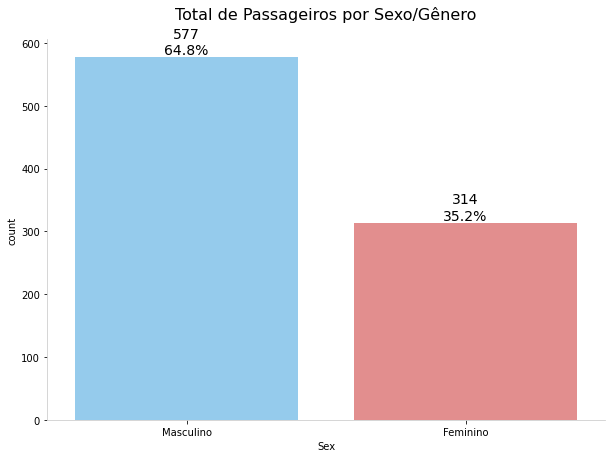

In [ ]:
# Countplot for gender
gender_colors = ['lightskyblue', 'lightcoral']
gender_map = {'male': 'Masculino', 'female': 'Feminino'}
plot_countplot(df=df, col='Sex', palette=gender_colors, label_names=gender_map,
               title='Total de Passageiros por Sexo/Gênero', fontsize = 30)

**Conclusões**:

- Pelo gráfico acima, percebe-se que o público de viajantes do Titanic era formado por aproximadamente $65$% de *Homens* e $35$% de *Mulheres*, o que provavelmente pode ser considerado um cenário padrão para a época $($ *afinal, estamos falando de algo ocorrido em meados de* $1911$ $)$.

- Ter em mente a volumetria total por sexo é essencial para uma análise mais aprofundada da taxa de sobrevivência por sexo.

#### **Taxa de Sobrevivência por Sexo**

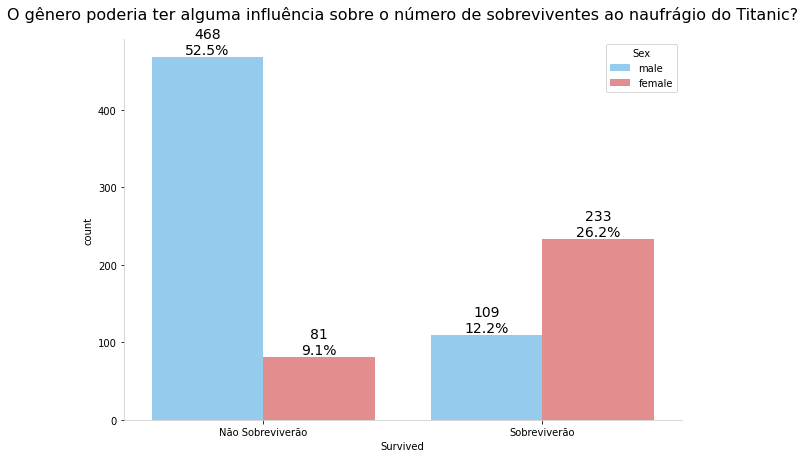

In [ ]:
# Taxa de Sobrevivência por Sexo
plot_countplot(df=df, col='Survived', hue='Sex', label_names=survived_map, palette=gender_colors,
               title="O gênero poderia ter alguma influência sobre o número de sobreviventes ao naufrágio do Titanic?")

**Conclusões**:

- O gráfico acima mostra que, das $549$ vítimas registradas $(61,6$% do total), temos $468$ $($ou $52,5$% $)$ *Homens* e apenas $81$ $($ou $9,1$% $)$ *Mulheres*.

- Por outro lado, dos $342$ $($ ou $38,4$% $)$ sobreviventes, temos $109$ (ou 12,2%) homens e 233 (ou 26,2%) mulheres.

- Em outras palavras, o gráfico mostra que houve uma possível prioridade de resgate dada às mulheres da embarcação, uma vez que sua parcela de representatividade é mais significativa no grupo de sobreviventes do que no grupo de vítimas.

- Para explicar esse cenário, é possível imaginar a existência de um possível protocolo de resgate para priorizar mulheres e crianças em casos de emergência.



#### **Traçando um gráfico de rosca dupla**

-  Outra forma de analisar a representatividade da sobrevivência por **Gênero** pode ser encontrada no gráfico de rosca dupla.

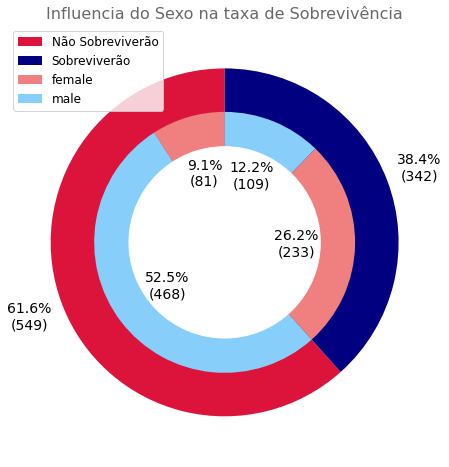

In [ ]:
# Gráfico de rosca dupla
plot_double_donut_chart(df=df, col1='Survived', col2='Sex', label_names_col1=survived_map,
                        colors1=['crimson', 'navy'], colors2=['lightcoral', 'lightskyblue'],
                        title="Influencia do Sexo na taxa de Sobrevivência", fontsize = 30)

**Conclusão**:

- *Ambos os gráficos mostram que as Mulheres tiveram prioridade no resgate durante o naufrágio*.

## <font color = 'Blue'> **Influência da Classe Social**</font>


- Agora vamos levar em consideração os valores presentes na variável $Pclass$, que, por sua vez, traz informações referentes à classe social de cada um dos passageiros presentes na embarcação.

#### **Número de passageiros para cada classe**

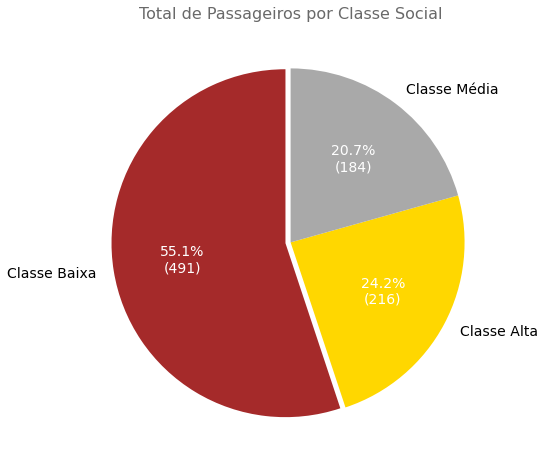

In [ ]:
# Número de passageiros por classe
pclass_map = {1: 'Classe Alta', 2: 'Classe Média', 3: 'Classe Baixa'}
plot_pie_chart(df=df, col='Pclass', colors=['brown', 'gold', 'darkgrey'],
               explode=(0.03, 0, 0), label_names=pclass_map,
               title="Total de Passageiros por Classe Social")

**Conclusão**:

- Com o gráfico de pizza acima, é possível perceber que a maioria dos passageiros e tripulantes do navio era formada por integrantes da $Classe Baixa$, representando pouco mais de $55$% do total presente.

#### **Relação entre Sobrevivência e Classe Social**

- *Agora, vamos analisar se essa variável poderia, de alguma forma, ter incluído a sobrevivência dos passageiros*

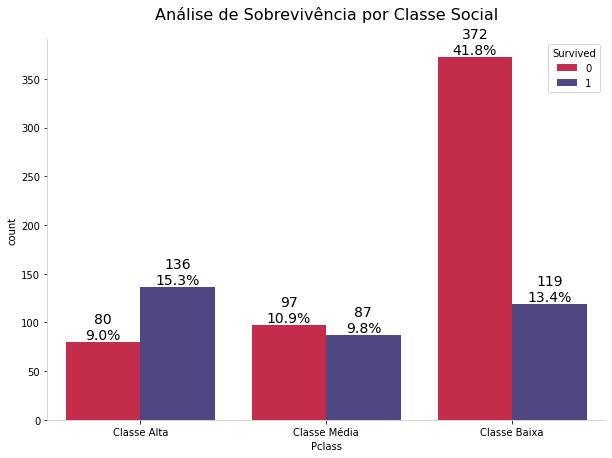

In [ ]:
# Relação entre sobrevivência e classe social
plot_countplot(df=df, col='Pclass', hue='Survived', label_names=pclass_map, palette=survived_colors,
               title="Análise de Sobrevivência por Classe Social")

**Conclusões**:

A partir da leitura do gráfico de barras acima, é possível perceber como as barras **vermelhas** $($*vítimas*$)$ e **azuis** $($ *sobreviventes* $)$ têm proporções diferentes para cada uma das classes sociais analisadas na base. Em geral, temos:

- <font color = 'Chocolate'> **Classe Alta**</font> $→$ *Há um número maior de sobreviventes do que de vítimas*;

- <font color = 'Chocolate'> **Classe Média**</font> $→$ *Um equilíbrio mais igualitário entre sobreviventes e vítimas*;

- <font color = 'Chocolate'> **Classe Baixa**</font> $→$ *Formada em sua maioria por vítimas*.


Esse cenário indica uma situação clara: os membros da chamada $Classe Alta$ tinham maiores chances de sobreviver ao naufrágio do que, por exemplo, os membros da $Classe Baixa$.

- Provavelmente algum privilégio foi dado a esses passageiros durante o resgate ou, de alguma forma, esses mesmos passageiros poderiam ser alocados em posições mais confortáveis/seguras no navio, facilitando assim o resgate.

#### **Influência da Classe Social na taxa de Sobrevivência**

- Uma outra forma de analisar essa representatividade de sobrevivência por **classe social** pode ser dada a partir do gráfico de barras agrupadas.

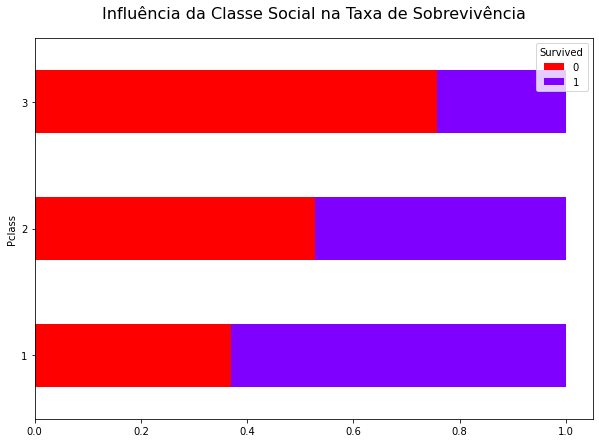

In [ ]:
plot_pct_countplot(df=df, col='Pclass', hue='Survived', palette='rainbow_r',
                   title='Influência da Classe Social na Taxa de Sobrevivência')

## <font color = 'Blue'> **Companheiros no Navio**</font>

- Existem duas variáveis no conjunto de dados que informam a presença de acompanhantes dos passageiros na embarcação, a saber, $SibSp$ *(número de irmãos ou cônjuges)* e $Parch$ *(número de pais ou filhos)*.

- Então, iremos analisar se, de alguma forma, a presença de acompanhantes influenciou na sobrevivência destes passageiros.

#### **Relação entre SibSp/Parch e Sobreviveu**

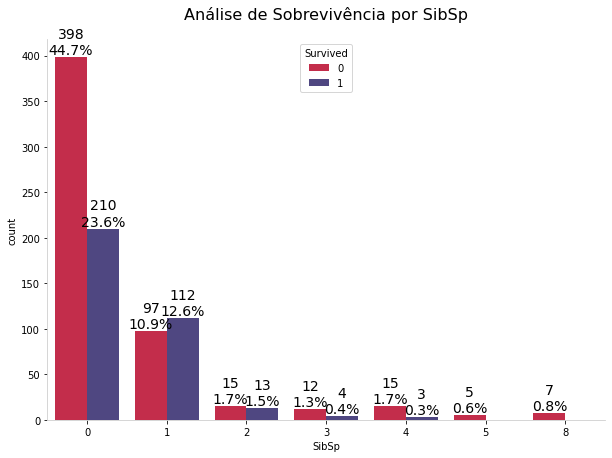

In [ ]:
# Relação entre SibSp/Parch e Sobreviveu
plot_countplot(df=df, col='SibSp', hue='Survived', orient='v', palette=survived_colors,
               title='Análise de Sobrevivência por SibSp')

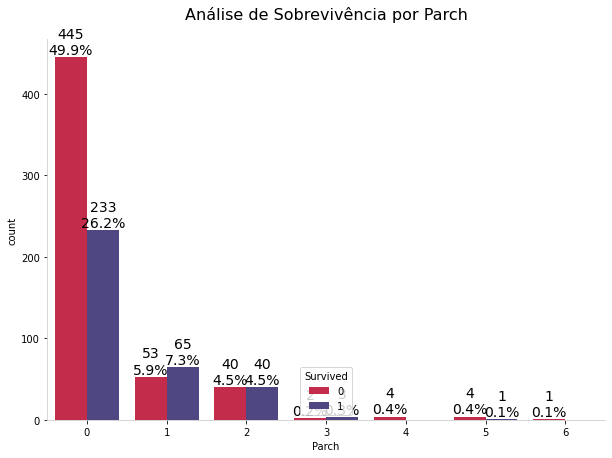

In [ ]:
# Relação entre SibSp/Parch e Sobreviveu
plot_countplot(df=df, col='Parch', hue='Survived', orient='v', palette=survived_colors,
               title='Análise de Sobrevivência por Parch')

**Conclusões**:

- Analisando os dois gráficos de barras acima, é possível inferir que passageiros acompanhados de $1$ ou $2$ pessoas, sejam eles irmãos, cônjuges, pais ou filhos, impedem um cenário de sobrevivência mais positivo em relação aos demais.

- É provável que, no cenário de resgate caótico, a presença de um número não muito alto e nem muito baixo de acompanhantes possa ter auxiliado no resgate em uma possível situação de ajuda mútua.

## <font color = 'Blue'> **Analisando o Fator Idade**</font>

- Pois bem, até este momento da análise exploratória, apenas os atributos categóricos presentes na base foram colocados em pauta. No entanto, o conjunto de dados disponíveis possui pelo menos duas variáveis numéricas de provável importância para o objetivo do projeto: *Idade* e *Ticket Médio*.

- Neste primeiro momento, analisaremos como a idade pode ter influenciado na sobrevivência dos passageiros do navio.

#### **Distribuição da variável Idade**

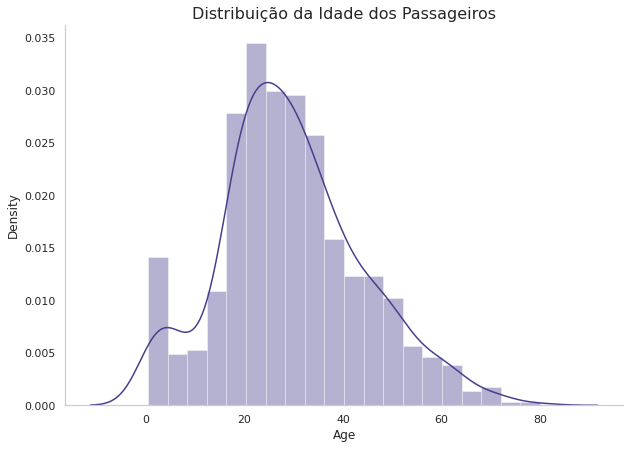

In [ ]:
# Distribuição da variável idade
plot_distplot(df=df, col='Age', title="Distribuição da Idade dos Passageiros", hist=True)

**Conclusão**:

- Na distribuição acima é possível ter uma ideia geral do público presente no navio em termos de idade. O pico de densidade ocorre por volta dos 25 anos de idade, indicando que a maior faixa de passageiros era formada por um público relativamente jovem.

#### **Relação entre a Distribuição da Idade dos passageiros Sobreviventes e Não Sobreviventes**

- Vamos repetir a análise de densidade acima e construir uma curva para *sobreviventes* e outra para *vítimas*.

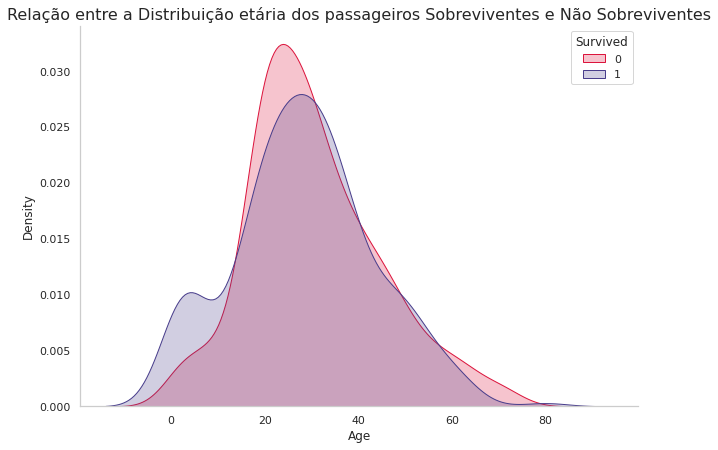

In [ ]:
plot_distplot(df=df, col='Age', hue='Survived', kind='kde', color_list=['crimson', 'darkslateblue'],
              title="Relação entre a Distribuição etária dos passageiros Sobreviventes e Não Sobreviventes")

**Conclusões**:

- No geral, o gráfico acima não mostra uma relação clara entre a influência da idade na sobrevivência dos passageiros.

- No entanto, é possível destacar alguns pontos sutis no gráfico, como, por exemplo, a elevação da curva em idades "*próximas a* $0$ ", indicando uma possível prioridade de resgate dada às crianças mais novas.

- Esse cenário também se repete, de forma ainda mais sutil, em uma parcela dos passageiros com mais de 80 anos.

## <font color = 'Blue'> **Analisando a Tarifa Paga pelos Passageiros**</font>  

- A variável $Fare$ no conjunto de dados traz o valor pago por cada passageiro para embarcar no *Titanic*.

Nas análises feitas anteriormente, Vimos que a *classe social* pode ter tido certa influência na chance de sobrevivência do passageiro.

#### **Distribuição do valor pago por Bilhete**

- Vamos ver se esse cenário se repete para o valor pago pelo Bilhete de passagem.

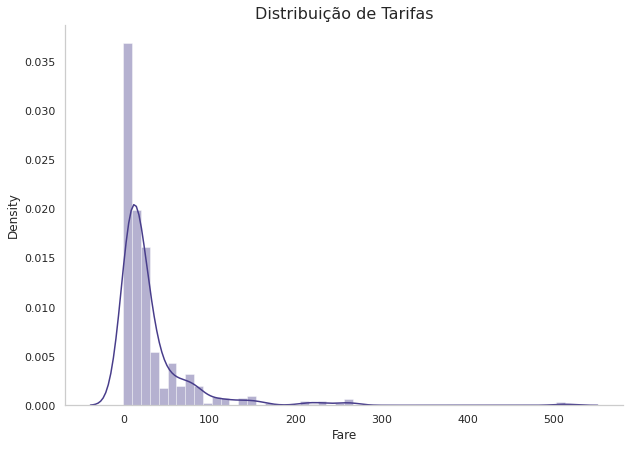

In [ ]:
plot_distplot(df=df, col='Fare', title='Distribuição de Tarifas', hist=True)

**Conclusão**:
- Aqui podemos ver a distribuição da variável $Fare$ com alguns **outliers** no lado direito da curva *(pessoas que pagaram um valor muito alto pela passagem)*.

#### **Distribuição Tarifária por Classe Social**

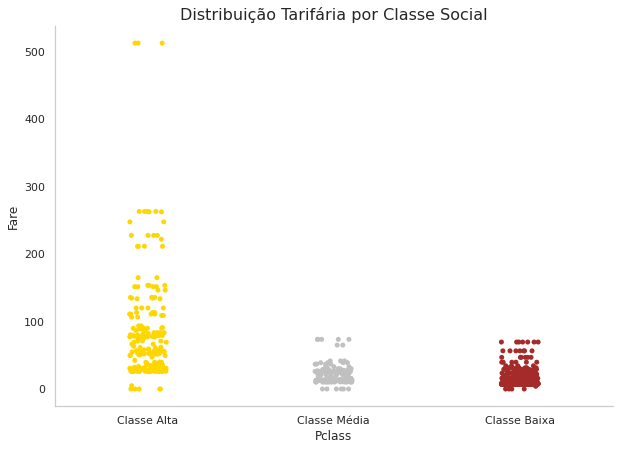

In [ ]:
# Distribuição Tarifária por Classe Social
plot_distplot(df=df, col='Fare', hue='Pclass', kind='strip', label_names=pclass_map,
              palette=['gold', 'silver', 'brown'],
              title="Distribuição Tarifária por Classe Social")

**Conclusão**:

- O gráfico acima mostra que, em geral, quanto maior a classe social do passageiro, maior o valor da passagem paga para entrar no navio. Algo esperado, mas de extrema importância sua visualização gráfica neste estudo.

#### **Distribuição da Tarifa por Gênero**

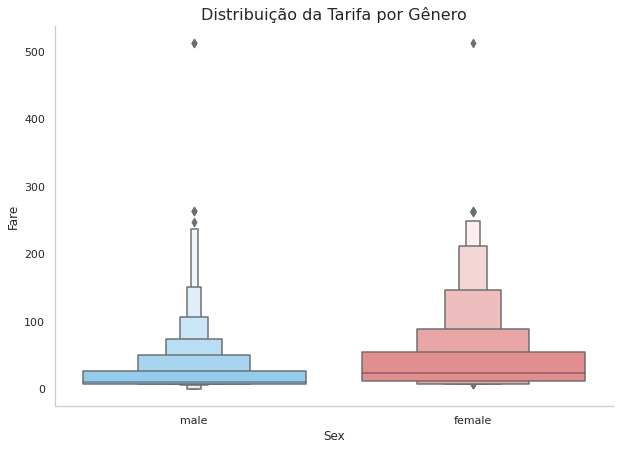

In [ ]:
plot_distplot(df=df, col='Fare', hue='Sex', kind='boxen', palette=gender_colors,
              title="Distribuição da Tarifa por Gênero")

**Conclusão**:
- É interessante notar que, em geral, as mulheres pagam valores mais elevados do que os homens.

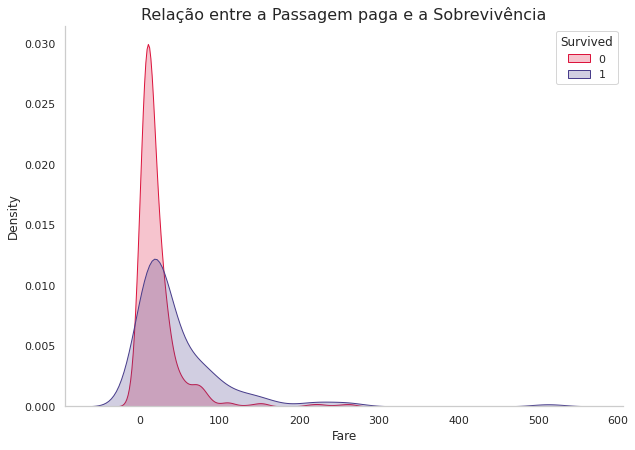

In [ ]:
plot_distplot(df=df, col='Fare', hue='Survived', kind='kde', color_list=['crimson', 'darkslateblue'],
              title="Relação entre a Passagem paga e a Sobrevivência")

**Conclusão**:

- Por fim, o gráfico acima mostra uma distribuição de densidade relacionando o **Ticket médio** pago por passageiro e o **Indicador de sobrevivência** da base de dados.

- Aqui é possível notar que a curva $Laranja$ referente aos sobreviventes $(Sobrevived = 1)$ tem maior concentração em valores altos para a variável Tarifa, indicando que o valor da passagem pode ter tido alguma influência na sobrevivência dos passageiros.

## <font color = 'Blue'> **Análise Simultânea**</font>  

$1.$ Dentro das ferramentas do módulo **insights** do pacote $xplotter$, é possível encontrar algumas funções construídas para facilitar a análise em várias colunas de uma base simultaneamente.

- Por exemplo, para visualizar as volumetrias de uma série de variáveis categóricas, seria possível executar a função **plot_multiple_catplots()**, conforme abaixo:

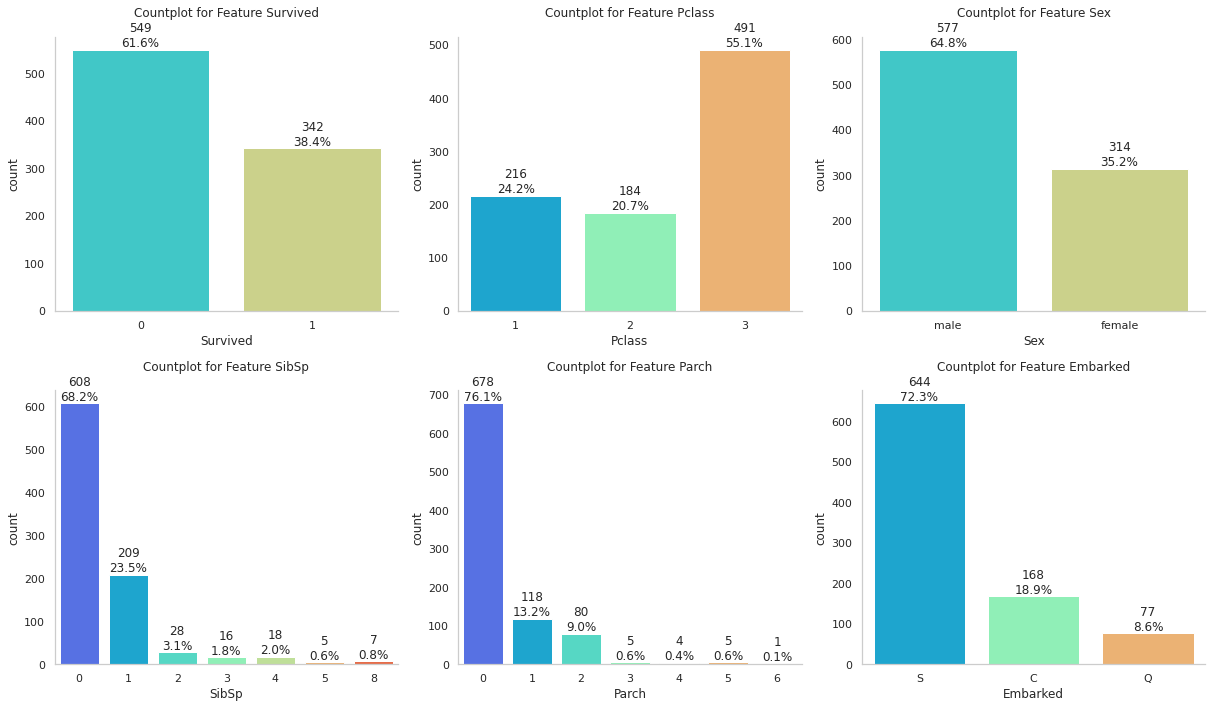

In [ ]:
cat_cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
plot_multiple_countplots(df=df, col_list=cat_cols, orient='v')

$2.$ Outra possibilidade é analisar colunas categóricas com base em uma coluna de agregação numérica.

- Para isso, o módulo $xplotter$ traz consigo a **funçãoplot_cat_agreg_report()**.

- O bloco abaixo analisa dinamicamente o comportamento da variável $Embarked$ e da variável $Tarifa$ em conjunto, respondendo questões como:

   - Qual o volume de passageiros por porto de saída?" ou "quais são as médias estatísticas do valor pago pela passagem?"

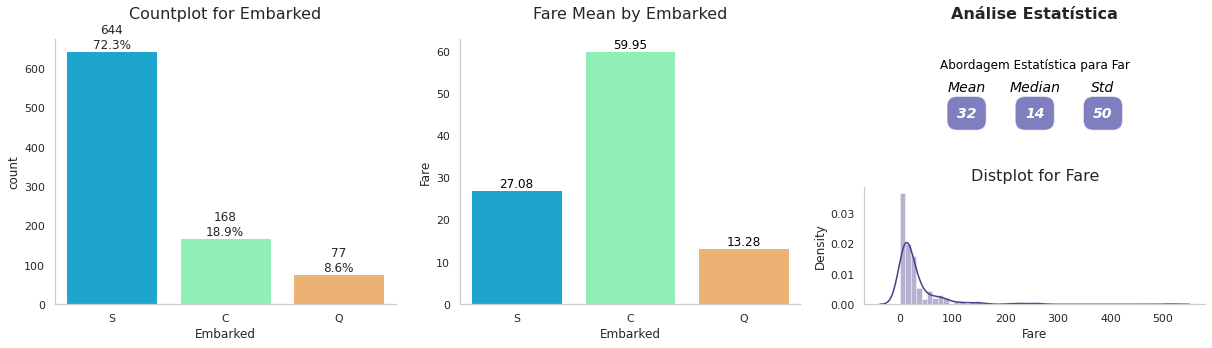

In [ ]:
plot_cat_aggreg_report(df=df, cat_col='Embarked', value_col='Fare', title3='Análise Estatística',
                       desc_text=f'Abordagem Estatística para Far',
                       stat_title_mean='Mean', stat_title_median='Median', stat_title_std='Std',
                       stat_title_x_pos=.3, stat_x_pos=.3, inc_x_pos=10)

#  <font color = 'Choco'> **MACHINE LEARNING**</font>

## <font color = 'green'> **Construção de Pipelines**</font>

- Após uma longa jornada na sessão de análise exploratória, reunimos insights valiosos que podem tornar o trabalho de modelagem muito mais fácil e intuitivo.

- Sendo assim, os próximos tópicos tratarão de uma etapa extremamente importante no treinamento de um modelo de aprendizado de máquina:

   - **A preparação do banco de dados**.


- Iremos utilizar o pacote $pycomp$, cuja construção foi motivada exatamente para facilitar o trabalho dos cientistas de dados na *preparação e modelagem*

- Para facilitar este trabalho, será utilizada uma ferramenta muito poderosa construída dentro do pacote $mlcomposer$. Trata-se do módulo **mlcomposer.transformers**, que consiste em classes prontas capazes de realizar uma série de atividades e transformações em um banco de dados, além de uma integração completa com Pipelines.

#### Antes de iniciar os passos referentes a essas transformações, vamos aplicar outra função igualmente poderosa do módulo $xplotter.insights$ capaz de retornar uma visão geral de um banco de dados.

In [ ]:
# Data overview from xplotter
data_overview(df=df)

,feature,qtd_null,pct_null,dtype,qtd_cat
0,Cabin,687,0.771044,object,147
1,Age,177,0.198653,float64,0
2,Embarked,2,0.002245,object,3
3,PassengerId,0,0.000000,int64,0
4,Survived,0,0.000000,int64,0
5,Pclass,0,0.000000,int64,0
6,Name,0,0.000000,object,891
7,Sex,0,0.000000,object,2
8,SibSp,0,0.000000,int64,0
9,Parch,0,0.000000,int64,0


### <font color = 'chocolater'> **Pipeline Inicial**</font>

##### **Recursos Personalizados**



- Nesta primeira sessão, vamos propor a construção de variáveis customizadas em nosso banco de dados, pensando em uma possível extração de valor de colunas que, em seu formato bruto, provavelmente não trazem insights relevantes para um modelo preditivo. Assim, os seguintes blocos de código terão como foco a extração de novos insights que podem ou não ser considerados no modelo final, conforme segue:

   - **name_title**: coluna que extrai a informação "titulo" do nome do passageiro (Mr, Mrs, etc.)

   - **cabin_class**: coluna responsável por trazer a “categoria” da cabine (A, B, C, etc.)

  - **ticket_class**: coluna que extrai informações categorizadas do Ticket do passageiro

  - **age_cat**: coluna para categorizar faixas etárias

  - **fare_cat**: Coluna de categorização de faixa de variável de tarifa

  - **family_size**: coluna para informar o tamanho total da família do passageiro


Para contemplar a extração dessas novas funcionalidades, será construída uma classe chamada $CustomFeaturesTitanic$, que, por sua vez, conterá a inteligência de extração baseada em RegEx e outras regras em sua própria estrutura para inclusão desta etapa em um possível pipeline de preparação.


- O objetivo principal é iterar esta e outras classes de transformação em busca das melhores combinações consideradas por um modelo de classificação.

## **Criando uma Classe**

- *Bibliotecas*

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import re

In [ ]:
class CustomFeaturesTitanic(BaseEstimator, TransformerMixin):

    def __init__(self, name_title=True, ticket_class=True, cabin_class=True, name_length=True,
                 age_cat=True, fare_cat=True, family_size=True, name_title_re='([a-zA-Z]+\.)',
                 ticket_class_re='[A-Z]+([/]{0,})([^\s.]+)', cabin_class_re = '\w',
                 age_bins=[0, 10, 20, 40, 60, 999], age_labels=['0_10', '10_20', '20_40', '40_60', 'greater_60'],
                 fare_bins=[0, 8, 15, 25, 50, 99999], fare_labels=['0_8', '8_15', '15_25', '25_50', 'greater_50']):
        self.name_title = name_title
        self.ticket_class = ticket_class
        self.cabin_class = cabin_class
        self.name_length = name_length
        self.age_cat = age_cat
        self.fare_cat = fare_cat
        self.family_size = family_size

        self.age_bins = age_bins
        self.age_labels = age_labels
        self.fare_bins = fare_bins
        self.fare_labels = fare_labels
        self.name_title_re = name_title_re
        self.ticket_class_re = ticket_class_re
        self.cabin_class_re = cabin_class_re

    def fit(self, df, y=None):
        return self

    def transform(self, df, y=None):

        # Extraindo feature relacionada ao título da pessoa
        if self.name_title:
            df['name_match'] = df['Name'].apply(lambda x: re.search(self.name_title_re, x))
            df['name_regex'] = df['name_match'].apply(lambda x: ''.join(x.groups()) if x is not None else np.nan)

            def extract_name_title(x, other_tag='OTHER'):
                if x not in ['Mr.', 'Miss.', 'Mrs.', 'Master.']:
                    x = other_tag
                return x

            df['name_title'] = df['name_regex'].apply(lambda x: extract_name_title(x))
            df.drop('name_match', axis=1, inplace=True)
            df.drop('name_regex', axis=1, inplace=True)

        # Extraindo feature relacionada a classe do ticket
        if self.ticket_class:
            df['ticket_match'] = df['Ticket'].apply(lambda x: re.search(self.ticket_class_re, x))
            df['ticket_regex'] = df['ticket_match'].apply(lambda x: x.group() if x is not None else 'all_numbers')

            # Definindo função para extração da classe
            def extract_ticket_class(x, other_tag='OTHER'):
                if x in ['A/5', 'A/4', 'A4', 'A/S']:
                    x = 'A'
                elif x in ['STON/O', 'SOTON/O', 'SOTON/OQ', 'STON/O2', 'SOTON/O2', 'SOTON']:
                    x = 'STON_SOTON'
                elif x in ['SC/PARIS', 'SC/Paris', 'SC/AH', 'SC']:
                    x = 'SC'
                elif x == 'PC':
                    x = 'PC'
                else:
                    x = other_tag
                return x

            df['ticket_class'] = df['ticket_regex'].apply(lambda x: extract_ticket_class(x))
            df.drop('ticket_match', axis=1, inplace=True)
            df.drop('ticket_regex', axis=1, inplace=True)

        # Extraindo feature relacionada a classe da cabine
        if self.cabin_class:
            df['cabin_match'] = df['Cabin'].apply(lambda x: re.search(self.cabin_class_re, x) if x is not np.nan else np.nan)
            df['cabin_regex'] = df['cabin_match'].apply(lambda x: x.group() if x is not np.nan else np.nan)

            # Definindo função para extração da classe
            def extract_cabin_class(x):
                if x in ['F', 'G', 'T']:
                    x = 'FGT'
                return x

            df['cabin_class'] = df['cabin_regex'].apply(lambda x: extract_cabin_class(x))
            df.drop('cabin_match', axis=1, inplace=True)
            df.drop('cabin_regex', axis=1, inplace=True)

        # Extraindo feature relacionada ao tamanho do nome
        if self.name_length:
            df['name_length'] = df['Name'].apply(lambda x: len(x))

        # Extraindo feature relacionada a categoria de idade
        if self.age_cat:
            df['age_cat'] = pd.cut(df['Age'], bins=self.age_bins, labels=self.age_labels)

        # Extraindo feature relacionada a categoria de Fare
        if self.fare_cat:
            df['fare_cat'] = pd.cut(df['Fare'], bins=self.fare_bins, labels=self.fare_labels)

        # Extraindo feature relacionada a tamanho da família
        if self.family_size:
            df['family_size'] = df['Parch'] + df['SibSp'] + 1

        return df

#### **Criando o objeto e aplicando transformação**

In [ ]:
# Criando objeto e aplicando transformação
feature_adder = CustomFeaturesTitanic(name_title=True, cabin_class=True, ticket_class=True)
df_custom = feature_adder.fit_transform(df)
df_custom.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_title,ticket_class,cabin_class,name_length,age_cat,fare_cat,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,A,NaN,23,20_40,0_8,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,PC,C,51,20_40,greater_50,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,STON_SOTON,NaN,22,20_40,0_8,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,OTHER,C,44,20_40,greater_50,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,OTHER,NaN,24,20_40,8_15,1


- *Após aplicar a função de transformação, seria interessante ver os resultados obtidos com as novas features criadas.*

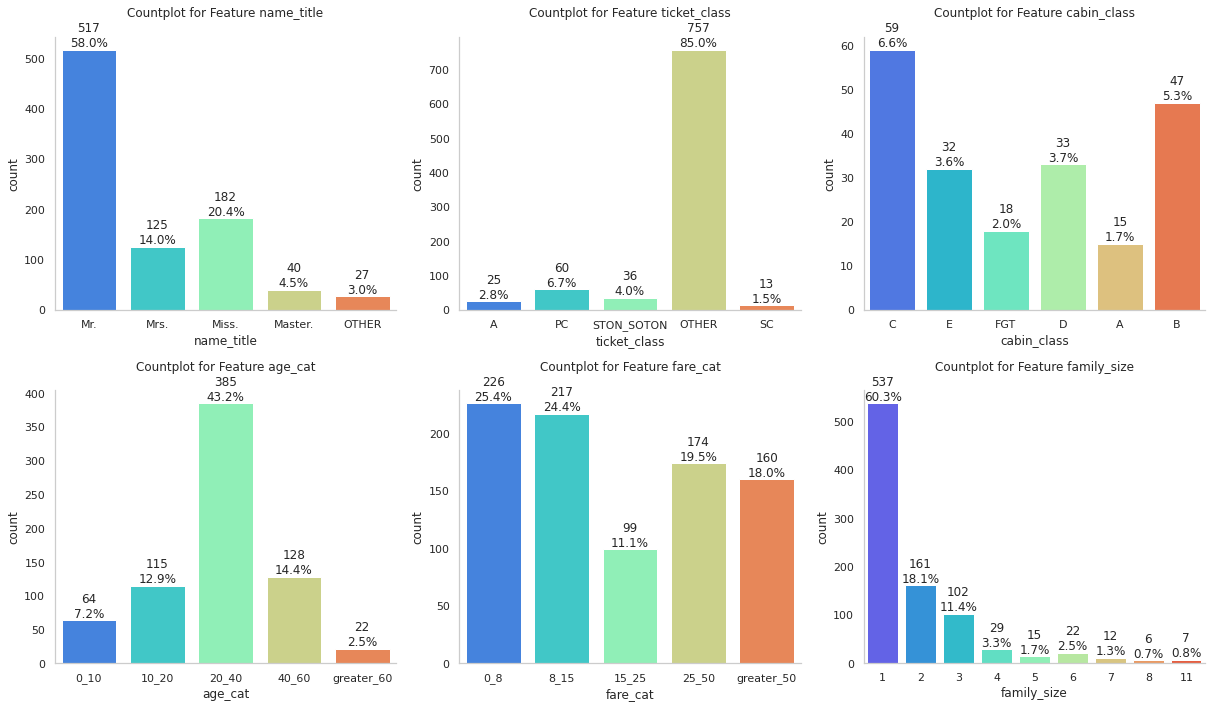

In [ ]:
# Novas Variáveis
custom_features = ['name_title', 'ticket_class', 'cabin_class', 'age_cat', 'fare_cat', 'family_size']
plot_multiple_countplots(df=df, col_list=custom_features)

**Conclusão**:

- Após a execução do método *fit_transform()* do objeto *feature_adder*, é possível perceber, na base resultante, a presença das três novas features consideradas anteriormente. Ao treinar um modelo preditivo, verificaremos se esses recursos são relevantes para a modelagem como um todo.

- Além disso, é possível analisar que, considerando um viés preditivo, nem todas as colunas da base serão utilizadas para prever a sobrevivência dos passageiros do navio.

Na prática, colunas como *Cabine, PassengerId, Ticket e Name*, por exemplo, não possuem significado prático para a modelagem preditiva, sendo responsáveis apenas por informações chave do passageiro ou indicadores únicos de cadastro.

Assim, como próximo passo, aplicaremos um processo de seleção de características para escolher apenas as variáveis candidatas dentro de um contexto de modelagem.

## **Características do Candidato**

- Definidas as variáveis presentes no conjunto inicial de features (variável INITIAL_FEATURES), é possível utilizar a classe **ColumnSelection()** do módulo $mlcomposer.transformers$ para aplicar o processo de seleção de features a atributos pré-selecionados.

In [ ]:
# Importando classe
from mlcomposer.transformers import ColumnSelection

# Características iniciais
TARGET = 'Survived'
TO_DROP = ['PassengerId', 'Name', 'Ticket', 'Cabin']
INITIAL_FEATURES = list(df.drop(TO_DROP, axis=1).columns)

# Aplicando transformador
selector = ColumnSelection(features=INITIAL_FEATURES)
df_slct = selector.fit_transform(df)

# Resultados
print(f'Formato do conjunto de Dados original: {df.shape}')
print(f'Formato do conjunto de Dados após a Seleção: {df_slct.shape}')
df_slct.head()

Formato do conjunto de Dados original: (891, 19)
Formato do conjunto de Dados após a Seleção: (891, 15)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,name_title,ticket_class,cabin_class,name_length,age_cat,fare_cat,family_size
0,0,3,male,22.0,1,0,7.2500,S,Mr.,A,NaN,23,20_40,0_8,2
1,1,1,female,38.0,1,0,71.2833,C,Mrs.,PC,C,51,20_40,greater_50,2
2,1,3,female,26.0,0,0,7.9250,S,Miss.,STON_SOTON,NaN,22,20_40,0_8,1
3,1,1,female,35.0,1,0,53.1000,S,Mrs.,OTHER,C,44,20_40,greater_50,2
4,0,3,male,35.0,0,0,8.0500,S,Mr.,OTHER,NaN,24,20_40,8_15,1


**Conclusão**:

- Pelas dimensões resultantes, pode-se observar que a aplicação da classe FiltraColunas resultou na redução de $4$ colunas da base original.

## **Dados Duplicados**

- A manipulação de dados duplicados é uma etapa importante na preparação da base para o treinamento do modelo. Isso porque eliminar dados duplicados também significa eliminar a redundância na base, permitindo aos modelos de aprendizado de máquina uma convergência mais rápida para mínimos locais/globais.

- Para realizar esta tarefa, será utilizada a classe **DuplicatesDimplicates** do módulo $pycomp.ml.transformers$ que, por sua vez, é responsável por simplesmente eliminar registros duplicados de um banco de dados passado como entrada.

In [ ]:
# Importando a Classe
from mlcomposer.transformers import DropDuplicates

# Aplicando a transformação
dup_dropper = DropDuplicates()
df_nodup = dup_dropper.fit_transform(df_slct)

# Resultados
print(f'Total de dados duplicados antes do tratamento: {df_slct.duplicated().sum()}')
print(f'Total de dados duplicados após o tratamento: {df_nodup.duplicated().sum()}')

Total de dados duplicados antes do tratamento: 17
Total de dados duplicados após o tratamento: 0


## **Modificando o Tipo**

- Durante as análises propostas na fase exploratória do projeto, foi possível perceber a presença de algumas colunas numéricas com significado categórico na base. Ou seja, são colunas que, em sua origem, são persistidas com tipos numéricos mas, na prática, representam categorias relacionadas a alguma informação específica como podemos ver em, por exemplo, $Pclass, SibSp$ e $Parch$ (mais especificamente em $Pclass$ do que nas demais e, a princípio, podemos considerar uma primeira versão trabalhando na transformação apenas na coluna $Pclass$).

- Assim, uma etapa importante para que os processos de preparação sejam aplicados corretamente, é a transformação dessas colunas numéricas em strings.

In [ ]:
# Importando classe
from mlcomposer.transformers import DtypeModifier

# Definições iniciais
cat_custom_features = ['Pclass']
mod_dict = {col: str for col in cat_custom_features}
print(f'Tipo de Colunas selecionadas antes da transformação:\n')
print(df_nodup.dtypes[cat_custom_features])

# Criando objeto e aplicando transformação
dtype_mod = DtypeModifier(mod_dict=mod_dict)
df_mod = dtype_mod.fit_transform(df_nodup)
print(f'Tipo de Colunas selecionadas depois da transformação:\n')
print(df_mod.dtypes[cat_custom_features])

Tipo de Colunas selecionadas antes da transformação:

Pclass    int64
dtype: object
Tipo de Colunas selecionadas depois da transformação:

Pclass    object
dtype: object


## **Dados de Treinamento e Validação**

- Finalizando o que poderíamos chamar de **pipeline inicial do projeto**, temos uma importante etapa responsável por separar o banco de dados em treinamento e teste. Pensando em uma futura etapa de modelagem, avaliar o resultado em diferentes bases é extremamente importante para tomar decisões sobre a melhor solução prática a ser colocada em produção.

- Para isso, usaremos a classe $SplitDados$ também do módulo $pycomp.ml.transformers$, que, por sua vez, aplica essa separação na base e nos retorna com os dados de treinamento e teste devidamente separados.

In [ ]:
# Importando a Classe
from mlcomposer.transformers import DataSplitter

# Aplicando a transformação
splitter = DataSplitter(target='Survived')
X_train, X_val, y_train, y_val = splitter.fit_transform(df_nodup)

# Resultados
print(f'Formato de X_train: {X_train.shape}')
print(f'Formato de X_val: {X_val.shape}')
print(f'Formato de y_train: {y_train.shape}')
print(f'Formato de y_val: {y_val.shape}')

Formato de X_train: (699, 14)
Formato de X_val: (175, 14)
Formato de y_train: (699,)
Formato de y_val: (175,)


- Com isso, encerramos a primeira etapa referente à análise de transformadores a serem aplicados em um pipeline inicial da base. A ideia é aplicar essas etapas comuns à base como um todo.

- A seguir serão construídos pipelines específicos de acordo com o tipo primitivo de cada coluna. Assim, teremos um pipeline numérico e um pipeline categórico que irão compor a segunda fase de transformação no processo de preparação.

## **Pipeline Numérico**

- Antes de iniciar as etapas referentes à construção de um pipeline numérico, é importante separar os atributos de nosso banco de dados de acordo com seus respectivos tipos primitivos. Para isso, criaremos duas listas diferentes contendo, em cada uma delas, as colunas categóricas e numéricas.

In [ ]:
# Separando os recursos numéricos dos categóricos
cat_custom_features = ['Pclass']

# Separando os tipos de dados
num_features = list(X_train.select_dtypes(exclude=['object', 'category']).columns)
cat_features = list(X_train.select_dtypes(include=['object', 'category']).columns)

# Selecionando as bases de dados
X_train_num = X_train[num_features]
X_train_cat = X_train[cat_features]

print(f'Variáveis Numéricas:\n{num_features}')
print(f'Variáveis Categóricas:\n{cat_features}')

Variáveis Numéricas:
['Age', 'SibSp', 'Parch', 'Fare', 'name_length', 'family_size']
Variáveis Categóricas:
['Pclass', 'Sex', 'Embarked', 'name_title', 'ticket_class', 'cabin_class', 'age_cat', 'fare_cat']


#### Dessa forma, podemos então iniciar as etapas de construção de transformadores específicos para os tipos numéricos e categóricos da base.

## **Dados Nulos ou Ausentes**

- Vimos, no início que algumas variáveis do banco de dados possuem dados nulos. É necessário, de alguma forma, realizar o tratamento desses dados para uma futura inserção em modelos preditivos.

- Recuperamos essa análise da visão geral base, usando agora apenas os dados de treinamento *(atributos filtrados e tratados)* no pipeline inicial.

In [ ]:
# Visualizando
df_overview = data_overview(X_train)
print(f'Visão geral dos dados Numéricos:')
data_overview(df=X_train).query('feature in @num_features')

Visão geral dos dados Numéricos:


,feature,qtd_null,pct_null,dtype,qtd_cat
1,Age,121,0.173104,float64,0
7,SibSp,0,0.000000,int64,0
8,Parch,0,0.000000,int64,0
9,Fare,0,0.000000,float64,0
12,name_length,0,0.000000,int64,0
13,family_size,0,0.000000,int64,0


- A tabela acima mostra a necessidade de manipulação de dados nulos na coluna Idade. Considerando a centralização das transformações em atributos numéricos nesta sessão, consideraremos o preenchimento de dados nulos para a variável $Age$ da classe SimpleImputer do sklearn. Como estratégia estatística, podemos inserir a mediana dessa variável para conclusão.

In [ ]:
# Importando Biblioteca
from sklearn.impute import SimpleImputer

# Aplicando a transformação
imputer = SimpleImputer(strategy='median')
X_train_num_imp = imputer.fit_transform(X_train_num)
X_train_num_imp = pd.DataFrame(X_train_num_imp, columns=num_features)

# Resultados
print(f'Dados nulos antes da imputação: {X_train_num.isnull().sum().sum()}')
print(f'Dados nulos apois a imputação: {X_train_num_imp.isnull().sum().sum()}')

Dados nulos antes da imputação: 121
Dados nulos apois a imputação: 0


- A princípio, não construiremos outros transformadores além de preencher os dados nulos em atributos numéricos. Desta forma, podemos começar a preparar os dados categóricos do banco de dados

## **Transformação Logarítmica**

- Para validar o impacto da transformação logarítmica nos modelos preditivos, vamos propor opcionalmente uma etapa no pipeline que aplica esse procedimento aos recursos numéricos presentes na base. Com isso, podemos validar se o desempenho final do modelo é sensível a esse tipo de transformação.

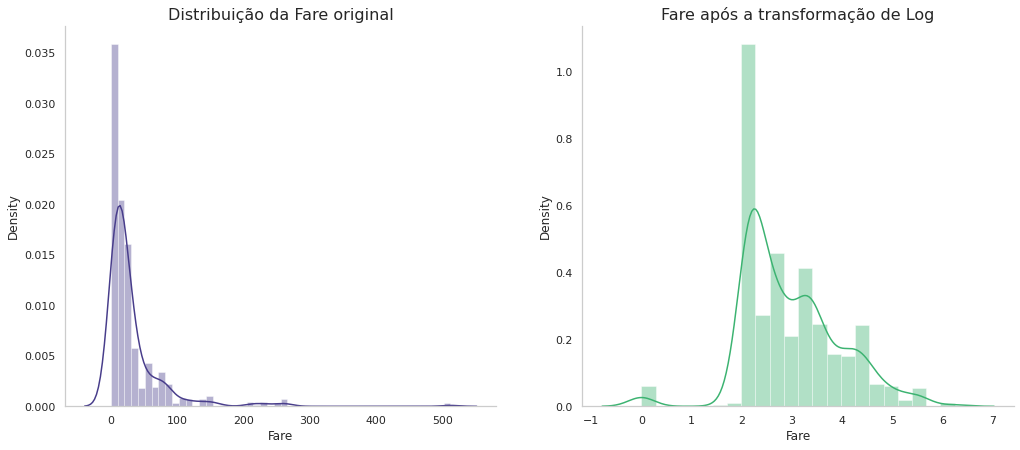

In [ ]:
# Exemplo
log_ex = 'Fare'
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))
plot_distplot(df=X_train_num, col=log_ex, ax=axs[0], hist=True,
              title=f'Distribuição da {log_ex} original')

tmp_data = X_train_num.copy()
tmp_data[log_ex] = tmp_data[log_ex].apply(lambda x: np.log1p(x))
plot_distplot(df=tmp_data, col=log_ex, ax=axs[1], color='mediumseagreen', hist=True,
              title=f'{log_ex} após a transformação de Log')

- Duas medidas estatísticas altamente relevantes para análise de distribuição são $skew$ e $kurtosis$.

- A transformação logarítmica ajuda a aumentar o desempenho para distribuições com assimetria positiva *(assimétrica à esquerda)*

- Assim, analisaremos novamente as características numéricas e classificaremos as principais características com oportunidade de melhoria através deste tipo de transformação.

In [ ]:
from scipy.stats import skew, kurtosis

tmp_ov = data_overview(df=X_train_num_imp)
tmp_ov['skew'] = tmp_ov.query('feature in @num_features')['feature'].apply(lambda x: skew(X_train_num_imp[x]))
tmp_ov['kurtosis'] = tmp_ov.query('feature in @num_features')['feature'].apply(lambda x: kurtosis(X_train_num_imp[x]))
tmp_ov[~tmp_ov['skew'].isnull()].sort_values(by='skew', ascending=False).loc[:, ['feature', 'skew', 'kurtosis']]

,feature,skew,kurtosis
3,Fare,4.624525,31.456252
1,SibSp,3.609052,17.045041
5,family_size,2.686255,8.970667
2,Parch,2.635933,9.152340
4,name_length,1.400023,2.539764
0,Age,0.492413,0.737518


- A tabela acima mostra uma lista de recursos por meio de suas medidas de simetria, assimetria e curtose.

- No bloco de código abaixo, executaremos a classe DynamicLogTransformation, que por sua vez tem a função de aplicar a transformação logarítmica em um banco de dados em um pipeline de preparação. A vantagem desta classe é a definição prévia de uma lista de features às quais a transformação será aplicada, que é definida pelo usuário.

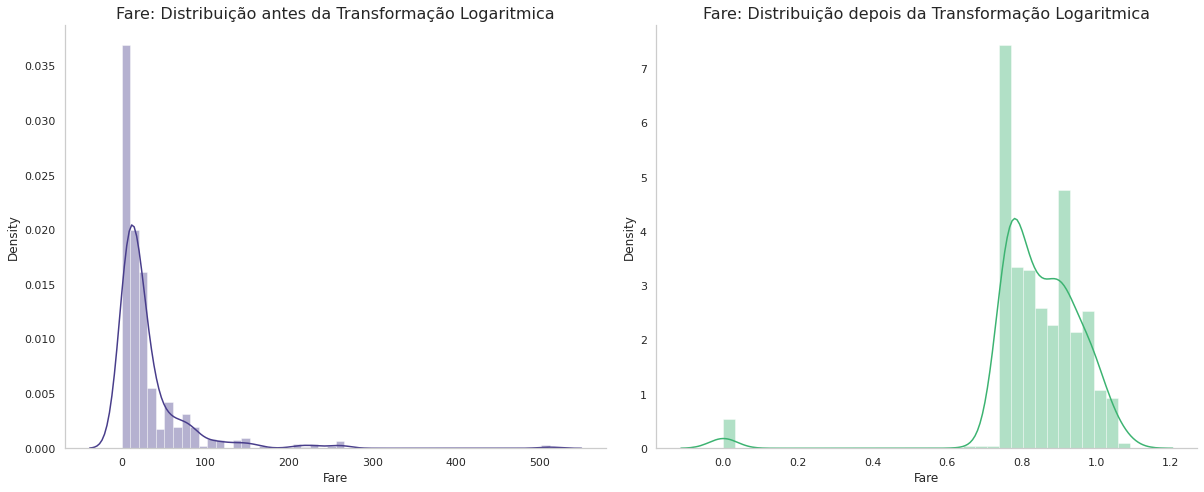

In [ ]:
# Importando a classe
from mlcomposer.transformers import DynamicLogTransformation

# Configurando os parêmetros
COLS_TO_LOG = ['Fare']
log_tr = DynamicLogTransformation(num_features=num_features, cols_to_log=COLS_TO_LOG)
X_train_num_ori = X_train_num_imp.copy()
X_train_num_log = log_tr.fit_transform(X_train_num_imp)

# Gráfico dos results
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))

plot_distplot(df=df, col=COLS_TO_LOG[0], ax=axs[0], hist=True,
              title=f'{COLS_TO_LOG[0]}: Distribuição antes da Transformação Logaritmica')
plot_distplot(df=X_train_num_log, col=COLS_TO_LOG[0], ax=axs[1], hist=True, color='mediumseagreen',
              title=f'{COLS_TO_LOG[0]}: Distribuição depois da Transformação Logaritmica')

plt.tight_layout()

- Adicionalmente, vale ressaltar que a classe $DynamicLogTransformation$ possuem um atributo booleano chamado **application** que pode ser utilizado futuramente para interações em *GridSearch* ou *RandomizedSearch*.

- Seu objetivo é permitir a análise de desempenho de modelos com ou sem a transformação logarítmica.

## **Normalizando**

- Outra forma interessante de aplicar um procedimento que ajude um determinado modelo preditivo a convergir para o valor ótimo mais rapidamente é dada pela normalização dos dados. Para o contexto de aprendizado de máquina, é possível usar classes sklearn prontas, por exemplo, **MinMaxScaler** ou **StandardScaler**.

- Este tipo de padronização/normalização pode opcionalmente ser aplicado diretamente no pipeline numérico. A seguir, será demonstrado um exemplo de como essa transformação pode ser aplicada ao nosso banco de dados numérico.

In [ ]:
# Importing class
from mlcomposer.transformers import DynamicScaler

scaler = DynamicScaler(scaler_type='Standard')
X_train_num_scaled = scaler.fit_transform(X_train_num_log)
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=num_features)
X_train_num_scaled.head()

,Age,SibSp,Parch,Fare,name_length,family_size
0,0.261284,0.426740,0.787046,0.229736,-0.220103,0.681048
1,0.714917,-0.485465,-0.486438,-0.530390,-0.953729,-0.573373
2,-0.116744,-0.485465,-0.486438,-0.552408,-0.429710,-0.573373
3,1.017339,0.426740,0.787046,0.394410,-0.953729,0.681048
4,0.110073,0.426740,0.787046,0.229736,1.980776,0.681048


- Com isso, encerramos as etapas de preparação no pipeline numérico do projeto. No futuro, consolidaremos cada uma dessas etapas em um único bloco de preparação usando o Pipeline da classe sklearn. Como próximos passos, vamos olhar para a parte categórica do conjunto.

## **Pipeline Categórico**

- Para esta sessão, sabemos que já existe a necessidade de preenchimento de dados nulos da coluna Embarked. Na análise realizada  acima, vimos que existem apenas 2 registros nulos para a coluna que informa o porto de saída de cada passageiro.

- Apesar de relativamente irrelevante, usaremos o mesmo $SimpleImputer$ aplicado anteriormente, mas com uma estratégia que leva em consideração a entrada mais comum presente na coluna como forma de preencher nulos.

#### *Encoding*

- Uma etapa extremamente importante envolvendo atributos categóricos do banco de dados e a aplicação de um processo conhecido como codificação de dados. A importância dessa etapa se deve à incapacidade da maioria dos modelos de aprendizado de máquina de ler entradas categóricas de um banco de dados fornecido como entrada. Isso porque, no fundo dos modelos mais comuns, diversos cálculos numéricos são realizados a fim de minimizar uma função de custo e atingir um erro mínimo, o que de fato é impossível na presença de variáveis categóricas.

- Para isso, existe o processo de codificação para aplicar uma espécie de “codificação” aos dados categóricos, muitas vezes separando-os em diferentes colunas, uma para cada entrada diferente. Neste contexto, podemos utilizar a classe $DummiesEncoding()$ do módulo $pycomp.ml.transformers$, que por sua vez é responsável por aplicar este processo automaticamente.

In [ ]:
# Importando a Classe
from mlcomposer.transformers import DummiesEncoding

# Aplicando a transformação
encoder = DummiesEncoding(cat_features_ori=cat_features, dummy_na=True)
X_train_cat_enc = encoder.fit_transform(X_train_cat)

# Resultados
print(f'Formato dos dados antes da codificação: {X_train_cat.shape}')
print(f'Formato dos dados apois a codificação: {X_train_cat_enc.shape}')
X_train_cat_enc.head()

Formato dos dados antes da codificação: (699, 8)
Formato dos dados apois a codificação: (699, 42)


,Pclass_1,Pclass_2,Pclass_3,Pclass_nan,Sex_female,Sex_male,Sex_nan,Embarked_C,Embarked_Q,Embarked_S,...,age_cat_20_40,age_cat_40_60,age_cat_greater_60,age_cat_nan,fare_cat_0_8,fare_cat_8_15,fare_cat_15_25,fare_cat_25_50,fare_cat_greater_50,fare_cat_nan
548,0,0,1,0,0,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
400,0,0,1,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
778,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
314,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
328,0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


## **Pipelines Completo**

##### Depois de passar por 3 grandes blocos envolvendo a configuração e aplicação de classes específicas para a preparação do nosso banco de dados, é possível consolidar essas etapas em objetos nativos da classe Pipeline do sklearn.

##### Nesta sessão, construiremos pipelines capazes de consolidar todas as etapas detalhadas até agora em objetos únicos de preparação. Tais objetos serão de extrema importância na reprodução desse fluxo e também na aplicação padronizada das etapas em novos dados a serem recebidos *(dados de teste, por exemplo)*. Assim, considerando os tópicos anteriores, construiremos:

- **initial_pipeline**: pipeline responsável por receber um banco de dados bruto e aplicar transformações comuns a todos os atributos;

- **prep_pipeline**: pipeline responsável por consolidar as transformações aplicadas aos dados numéricos e categóricos em um único objeto.

- *Bibliotecas*

In [ ]:
# Importing libraries
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [ ]:
# Setting global variables
TARGET = 'Survived'

INITIAL_FEATURES = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'name_title',
                    'ticket_class', 'cabin_class', 'name_length', 'age_cat', 'fare_cat', 'family_size']
INITIAL_PRED_FEATURES = [col for col in INITIAL_FEATURES if col not in TARGET]

DTYPE_MODIFICATION_DICT = {'Pclass': str}

NUM_FEATURES = ['Age', 'SibSp', 'Parch', 'Fare', 'name_length', 'family_size']
CAT_FEATURES = ['Pclass', 'Sex', 'Embarked', 'name_title', 'ticket_class', 'cabin_class', 'age_cat', 'fare_cat']

CAT_FEATURES_FINAL = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Pclass_nan', 'Sex_female', 'Sex_male', 'Sex_nan',
                      'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan', 'name_title_Master.',
                      'name_title_Miss.', 'name_title_Mr.', 'name_title_Mrs.', 'name_title_OTHER',
                      'name_title_nan', 'ticket_class_A', 'ticket_class_OTHER', 'ticket_class_PC',
                      'ticket_class_SC', 'ticket_class_STON_SOTON', 'ticket_class_nan', 'cabin_class_A',
                      'cabin_class_B', 'cabin_class_C', 'cabin_class_D', 'cabin_class_E', 'cabin_class_FGT',
                      'cabin_class_nan', 'age_cat_0_10', 'age_cat_10_20', 'age_cat_20_40', 'age_cat_40_60',
                      'age_cat_greater_60', 'age_cat_nan', 'fare_cat_0_8', 'fare_cat_15_25',
                      'fare_cat_25_50', 'fare_cat_8_15', 'fare_cat_greater_50', 'fare_cat_nan']

MODEL_FEATURES = NUM_FEATURES + CAT_FEATURES_FINAL

# Variables for numerical pipeline
NUM_STRATEGY_IMPUTER = 'median'
SCALER_TYPE = None
LOG_APPLICATION = False
COLS_TO_LOG = ['Fare', 'Age']

# Variables for categorical pipeline
ENCODER_DUMMY_NA = True
NAME_TITLE = True
CABIN_CLASS = True
TICKET_CLASS = True
NAME_LENGTH = True
AGE_CAT = True
FARE_CAT = True
FAMILY_SIZE = True

# Building initial pipelines (train and prediction)
initial_train_pipeline = Pipeline([
    ('feature_adder', CustomFeaturesTitanic(name_title=NAME_TITLE, cabin_class=CABIN_CLASS,
                                            ticket_class=TICKET_CLASS, name_length=NAME_LENGTH,
                                            age_cat=AGE_CAT, fare_cat=FARE_CAT, family_size=FAMILY_SIZE)),
    ('col_filter', ColumnSelection(features=INITIAL_FEATURES)),
    ('dtype_modifier', DtypeModifier(mod_dict=DTYPE_MODIFICATION_DICT)),
    ('dup_dropper', DropDuplicates())
])

initial_pred_pipeline = Pipeline([
    ('feature_adder', CustomFeaturesTitanic(name_title=NAME_TITLE, cabin_class=CABIN_CLASS,
                                            ticket_class=TICKET_CLASS, name_length=NAME_LENGTH,
                                            age_cat=AGE_CAT, fare_cat=FARE_CAT, family_size=FAMILY_SIZE)),
    ('col_filter', ColumnSelection(features=INITIAL_PRED_FEATURES)),
    ('dtype_modifier', DtypeModifier(mod_dict=DTYPE_MODIFICATION_DICT))
])

# Building a numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy=NUM_STRATEGY_IMPUTER)),
    ('log_transformer', DynamicLogTransformation(application=LOG_APPLICATION, num_features=NUM_FEATURES,
                                                 cols_to_log=COLS_TO_LOG)),
    ('scaler', DynamicScaler(scaler_type=SCALER_TYPE))
])

# Building a categorical pipeline
cat_pipeline = Pipeline([
    ('encoder', DummiesEncoding(dummy_na=ENCODER_DUMMY_NA, cat_features_final=CAT_FEATURES_FINAL))
])

# Building a complete pipeline
prep_pipeline = ColumnTransformer([
    ('num', num_pipeline, NUM_FEATURES),
    ('cat', cat_pipeline, CAT_FEATURES)
])

In [ ]:
# Lendo dados brutos
df = pd.read_csv('Titanic_train.csv')

# Executando o pipeline de treinamento inicial
df_prep = initial_train_pipeline.fit_transform(df)

# Dividindo os dados em treinamento e teste
X_train, X_val, y_train, y_val = train_test_split(df_prep.drop(TARGET, axis=1), df_prep[TARGET].values,
                                                  test_size=.20, random_state=42)

# Executando o pipeline de preparação
X_train_prep = prep_pipeline.fit_transform(X_train)
X_val_prep = prep_pipeline.fit_transform(X_val)

# Results
print(f'Formato de X_train_prep: {X_train_prep.shape}')
print(f'Formato de X_val_prep: {X_val_prep.shape}')
print(f'\nCaracterísticas totais consideradas: {len(MODEL_FEATURES)}')

Formato de X_train_prep: (699, 48)
Formato de X_val_prep: (175, 48)

Características totais consideradas: 48


- Agora, estamos prontos para iniciar a etapa de modelagem preditiva em busca da construção de um modelo capaz de retornar a probabilidade de sobrevivência dos passageiros do Titanic frente às variáveis consideradas para análise.

- Antes de mergulhar nos tópicos relacionados à previsão de sobrevivência, vamos usar a base final preparada para plotar uma matriz de correlação em relação à variável alvo do modelo (Sobrevivencia). O objetivo deste estudo é ter uma ideia prévia das variáveis mais importantes presentes no banco de dados.

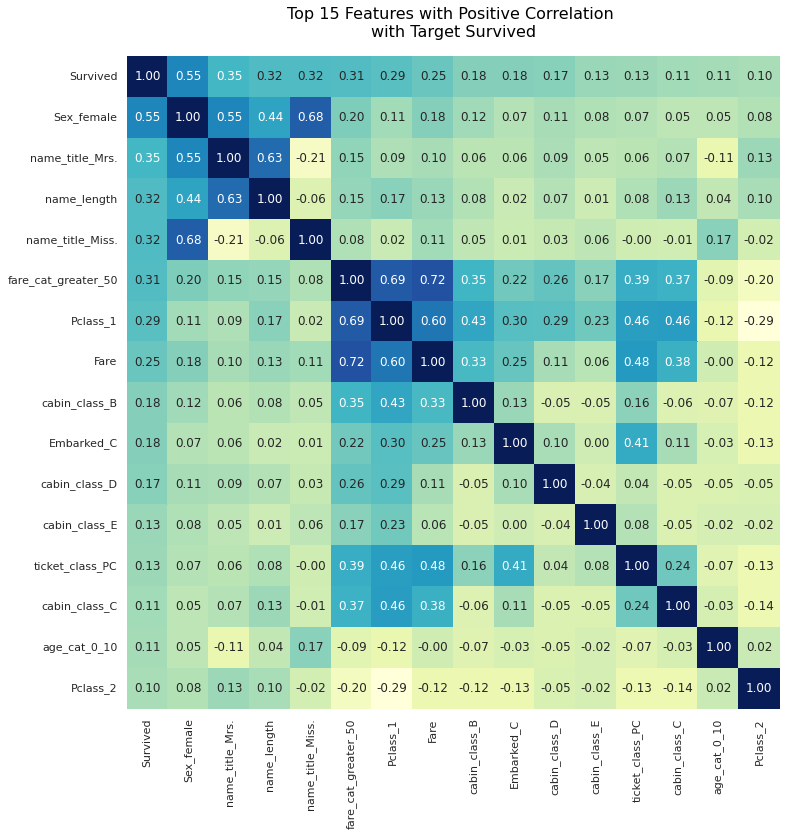

In [ ]:
# Preparando um DataFrame final após a transformação
df_prep = pd.DataFrame(X_train_prep, columns=MODEL_FEATURES)
df_prep['Survived'] = y_train

# Traçando uma matriz de correlação
plot_corr_matrix(df=df_prep, corr_col='Survived', figsize=(12, 12), cbar=False, n_vars=15)

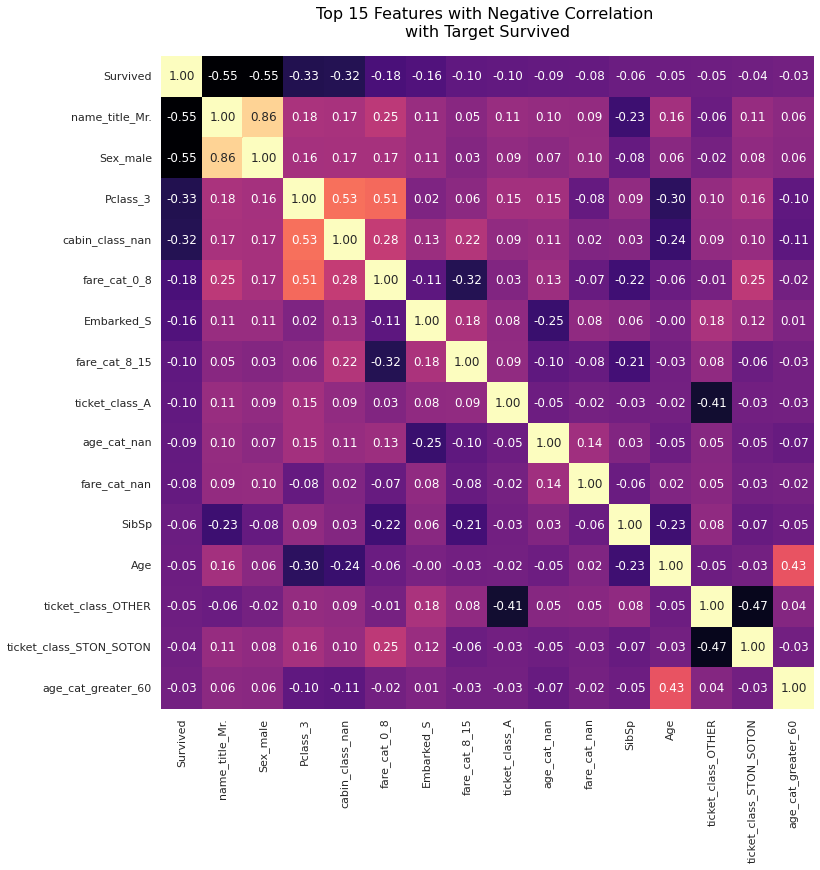

In [ ]:
plot_corr_matrix(df=df_prep, corr='negative', corr_col='Survived', figsize=(12, 12), cbar=False, n_vars=15)

## <font color = 'Red'> **Modelagem**</font> $→$ <font color = 'GREYa'> **Prevendo a Sobrevivência**</font>

- Por fim, iremos finalmente realizamos o treinamento de modelos de aprendizado de máquina em busca do melhor algoritmo capaz de devolver a probabilidade de sobrevivência dos passageiros e tripulantes do navio frente ao naufrágio.

- Para chegar a esse estágio, passamos por uma densa sessão de análise exploratória que nos ajudou muito na coleta de insights e no entendimento completo da base de dados disponível, além de uma rica sessão onde foi possível construir pipelines definitivos para a preparação do dataset.


#### Desta forma, podemos separar a etapa de modelagem em:

- **Definições iniciais**, onde definiremos os blocos fundamentais para o início do treinamento, como por exemplo, os modelos utilizados e seus respectivos hiperparâmetros de busca;

- **Treinamento**, onde aplicaremos, de fato, o treinamento dos modelos selecionados na etapa anterior. Para isso, usaremos, mais uma vez, recursos poderosos do pacote pycomp de seu módulo pycomp.ml.trainer;


- **Avaliação**, onde, após o devido treinamento dos modelos candidatos, analisaremos os desempenhos individuais de cada um frente à tarefa de previsão proposta.

### **Variáveis Estruturantes**

- Como mencionado anteriormente, esta é a etapa onde preparamos as estruturas para o início dos treinamentos. Aqui, o objetivo é importar e preparar os modelos de classificação a serem usados para prever a sobrevivência dos passageiros.

In [ ]:
# Importando os Modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Criando os Modelos
dtree = DecisionTreeClassifier()
forest = RandomForestClassifier()
lgbm = LGBMClassifier()
xgb = XGBClassifier()
adaboost = AdaBoostClassifier()
gradboost = GradientBoostingClassifier()

# Criando um dicionário como os Classificadores
model_obj = [dtree, forest, lgbm, xgb, adaboost, gradboost]
model_names = [type(model).__name__ for model in model_obj]
set_classifiers = {name: {'model': obj, 'params': {}} for (name, obj) in zip(model_names, model_obj)}

print(f'Classificadores que serão treinados nas próximas etapas: \n\n{model_names}')

Classificadores que serão treinados nas próximas etapas: 

['DecisionTreeClassifier', 'RandomForestClassifier', 'LGBMClassifier', 'XGBClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier']


### **Treinando os Modelos**

- Uma vez preparada a estrutura de modelagem a partir de objetos específicos, como o dicionário set_classifiers, já é possível importar a classe **ClassifierBinary** presente no módulo $pycomp.ml.trainer$ para realizar todo o treinamento e avaliação dos modelos.

In [ ]:
# Importando a Classe
from mlcomposer.trainer import BinaryClassifier

# Criando um objeto e iniciando o treinamento
trainer = BinaryClassifier()
trainer.fit(set_classifiers, X_train_prep, y_train)

DEBUG;2022-11-26 17:03:46;trainer.py;trainer;410;Training model DecisionTreeClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Training model DecisionTreeClassifier
DEBUG;2022-11-26 17:03:46;trainer.py;trainer;410;Training model RandomForestClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Training model RandomForestClassifier
DEBUG;2022-11-26 17:03:46;trainer.py;trainer;410;Training model LGBMClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Training model LGBMClassifier
DEBUG;2022-11-26 17:03:46;trainer.py;trainer;410;Training model XGBClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Training model XGBClassifier
DEBUG;2022-11-26 17:03:47;trainer.py;trainer;410;Training model AdaBoostClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Training model AdaBoostClassifier
DEBUG;2022-11-26 17:03:47;trainer.py;trainer;410;Training model GradientBoostingCl

- O método **fit()** do objeto treinador criado é responsável por treinar os modelos encapsulados no dicionário set_classifiers criado na etapa inicial de definições.

- Ao configurar o método para aplicar também o processo **RandomizedSearchCV* (*busca aleatória dos melhores hiperparâmetros de cada algoritmo*), é possível construir modelos otimizados de acordo com o espaço de busca passado no dicionário set_classifiers.

### **Avaliação de Desempenho dos Modelos**

- Uma vez treinados os modelos através do método $fit()$, então é possível avaliar o desempenho obtido em cada caso, retornando assim as principais métricas de classificação capazes de indicar a melhor direção para a tarefa dada.

- Para realizar este processo, podemos usar os métodos **avalia_performance()** ou **plot_metrics()** do objeto treinador.

  - *No primeiro caso*, o retorno é um DataFrame analítico contendo o resultado da avaliação de cada modelo frente às principais métricas.
  
  - *No segundo caso*, o retorno é uma análise visual das métricas de cada um dos modelos.

In [ ]:
# Análise de resultados de treinamento
metrics = trainer.evaluate_performance(X_train_prep, y_train, X_val_prep, y_val)
metrics

DEBUG;2022-11-26 17:08:02;trainer.py;trainer;483;Computing metrics on DecisionTreeClassifier using cross validation with 5 K-folds
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Computing metrics on DecisionTreeClassifier using cross validation with 5 K-folds
INFO;2022-11-26 17:08:02;trainer.py;trainer;515;Sucessfully computed metrics on training data in 0.121 seconds
INFO:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Sucessfully computed metrics on training data in 0.121 seconds
DEBUG;2022-11-26 17:08:02;trainer.py;trainer;548;Computing metrics on DecisionTreeClassifier using validation data
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Computing metrics on DecisionTreeClassifier using validation data
INFO;2022-11-26 17:08:02;trainer.py;trainer;577;Sucesfully computed metrics using validation data for DecisionTreeClassifier on 0.009 seconds
INFO:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Sucesfully computed metr

,model,approach,acc,precision,recall,f1,auc,total_time,anomesdia_datetime
0,DecisionTreeClassifier,Train 5 K-folds,0.7768,0.7169,0.7043,0.7176,0.7722,0.121,2022-11-26 17:08:17.721614
1,DecisionTreeClassifier,Validation,0.6914,0.6981,0.4933,0.5781,0.6667,0.009,2022-11-26 17:08:17.721614
2,RandomForestClassifier,Train 5 K-folds,0.8183,0.7843,0.7454,0.7581,0.8647,4.996,2022-11-26 17:08:17.721614
3,RandomForestClassifier,Validation,0.8114,0.8500,0.6800,0.7556,0.8558,0.036,2022-11-26 17:08:17.721614
4,LGBMClassifier,Train 5 K-folds,0.8140,0.7774,0.7230,0.7478,0.8593,1.139,2022-11-26 17:08:17.721614
5,LGBMClassifier,Validation,0.7829,0.7937,0.6667,0.7246,0.8543,0.018,2022-11-26 17:08:17.721614
6,XGBClassifier,Train 5 K-folds,0.8384,0.8137,0.7491,0.7797,0.8673,2.257,2022-11-26 17:08:17.721614
7,XGBClassifier,Validation,0.8000,0.8125,0.6933,0.7482,0.8612,0.008,2022-11-26 17:08:17.721614
8,AdaBoostClassifier,Train 5 K-folds,0.8111,0.7486,0.7637,0.7556,0.8469,2.623,2022-11-26 17:08:17.721614
9,AdaBoostClassifier,Validation,0.8000,0.7857,0.7333,0.7586,0.8460,0.027,2022-11-26 17:08:17.721614


- Conforme mencionado anteriormente, o método **avalia_performance()** retorna uma tabela analítica contendo o desempenho de cada modelo (no treinamento e no teste) para as principais métricas de avaliação dos modelos de classificação. A partir dessa tabela, é possível apontar que, em termos de precisão, o modelo **RandomForest** teve desempenho um pouco melhor que os demais, apesar do alto tempo necessário para realizar os cálculos.

- Pensando em definir, de fato, um objetivo de otimização para escolher o melhor modelo preditivo, vamos considerar a acurácia como a métrica a ser utilizada para essa decisão. Outra forma de analisar o desempenho dos modelos candidatos é por meio do método **plot_metrics()**. Seu resultado pode ser visto abaixo:

DEBUG;2022-11-26 17:10:30;trainer.py;trainer;835;Initializing plot for visual evaluation of classifiers
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Initializing plot for visual evaluation of classifiers
DEBUG;2022-11-26 17:10:30;trainer.py;trainer;839;Returning metrics through cross validation for DecisionTreeClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Returning metrics through cross validation for DecisionTreeClassifier
DEBUG;2022-11-26 17:10:30;trainer.py;trainer;839;Returning metrics through cross validation for RandomForestClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Returning metrics through cross validation for RandomForestClassifier
DEBUG;2022-11-26 17:10:34;trainer.py;trainer;839;Returning metrics through cross validation for LGBMClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Returning metrics through cross validation for LGBMClassifier
DEBUG;2022-11-26 17:10

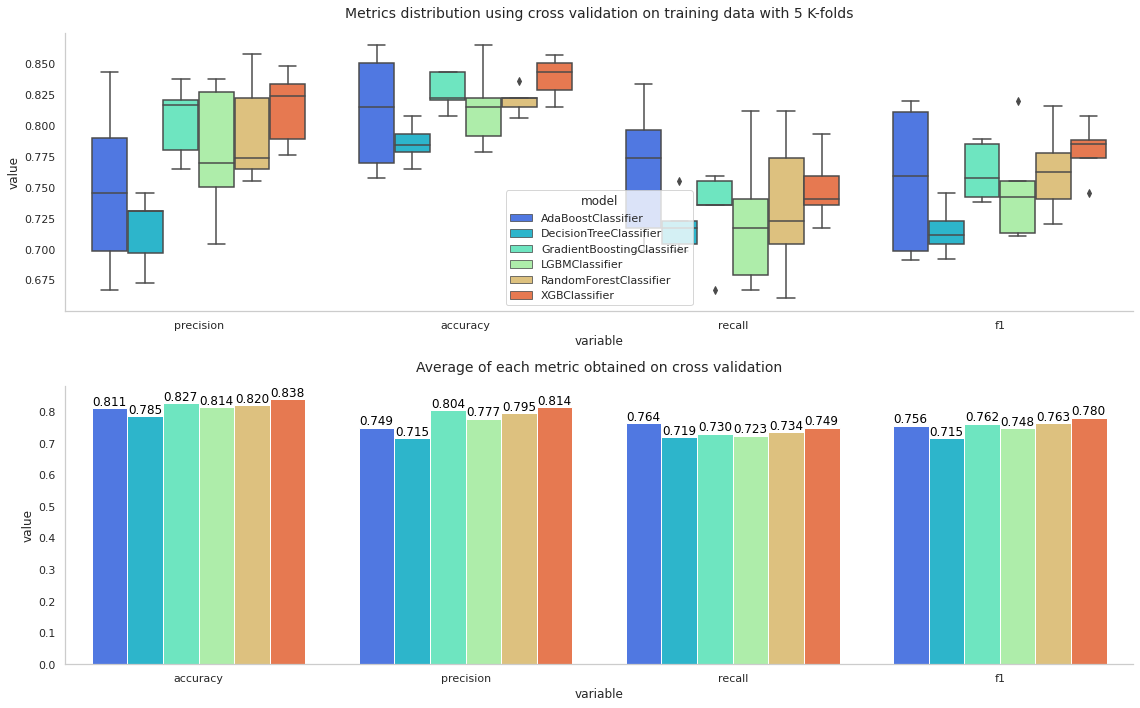

In [ ]:
# Análise gráfica de desempenho
trainer.plot_metrics()

- Graficamente, é possível visualizar a superioridade do modelo RandomForest em termos de precisão. Na primeira linha, há uma análise de boxplot considerando as k dobras utilizadas na validação cruzada e, a partir dela, é possível visualizar a dispersão de cada rodada de avaliação para cada modelo candidato. Na segunda linha do gráfico, há uma análise da média por métrica e por modelo candidato.

#### **Características mais relevantes**

- Melhorando ainda mais a análise dos resultados, é possível devolver a importância que cada característica da base teve no resultado final da previsão. Vejamos os recursos mais importantes considerados por cada modelo do método plot_feature_importance()

DEBUG;2022-11-26 17:13:16;trainer.py;trainer;936;Initializing feature importance visual analysis for the models
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Initializing feature importance visual analysis for the models
DEBUG;2022-11-26 17:13:16;trainer.py;trainer;947;Extracting feature importance from DecisionTreeClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Extracting feature importance from DecisionTreeClassifier
DEBUG;2022-11-26 17:13:16;trainer.py;trainer;960;Plotting feature importances for DecisionTreeClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Plotting feature importances for DecisionTreeClassifier
INFO;2022-11-26 17:13:16;trainer.py;trainer;970;Succesfully plotted feature importance analysis for DecisionTreeClassifier
INFO:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Succesfully plotted feature importance analysis for DecisionTreeClassifier
DEBUG;2022-11-26 17:13:16;trainer.

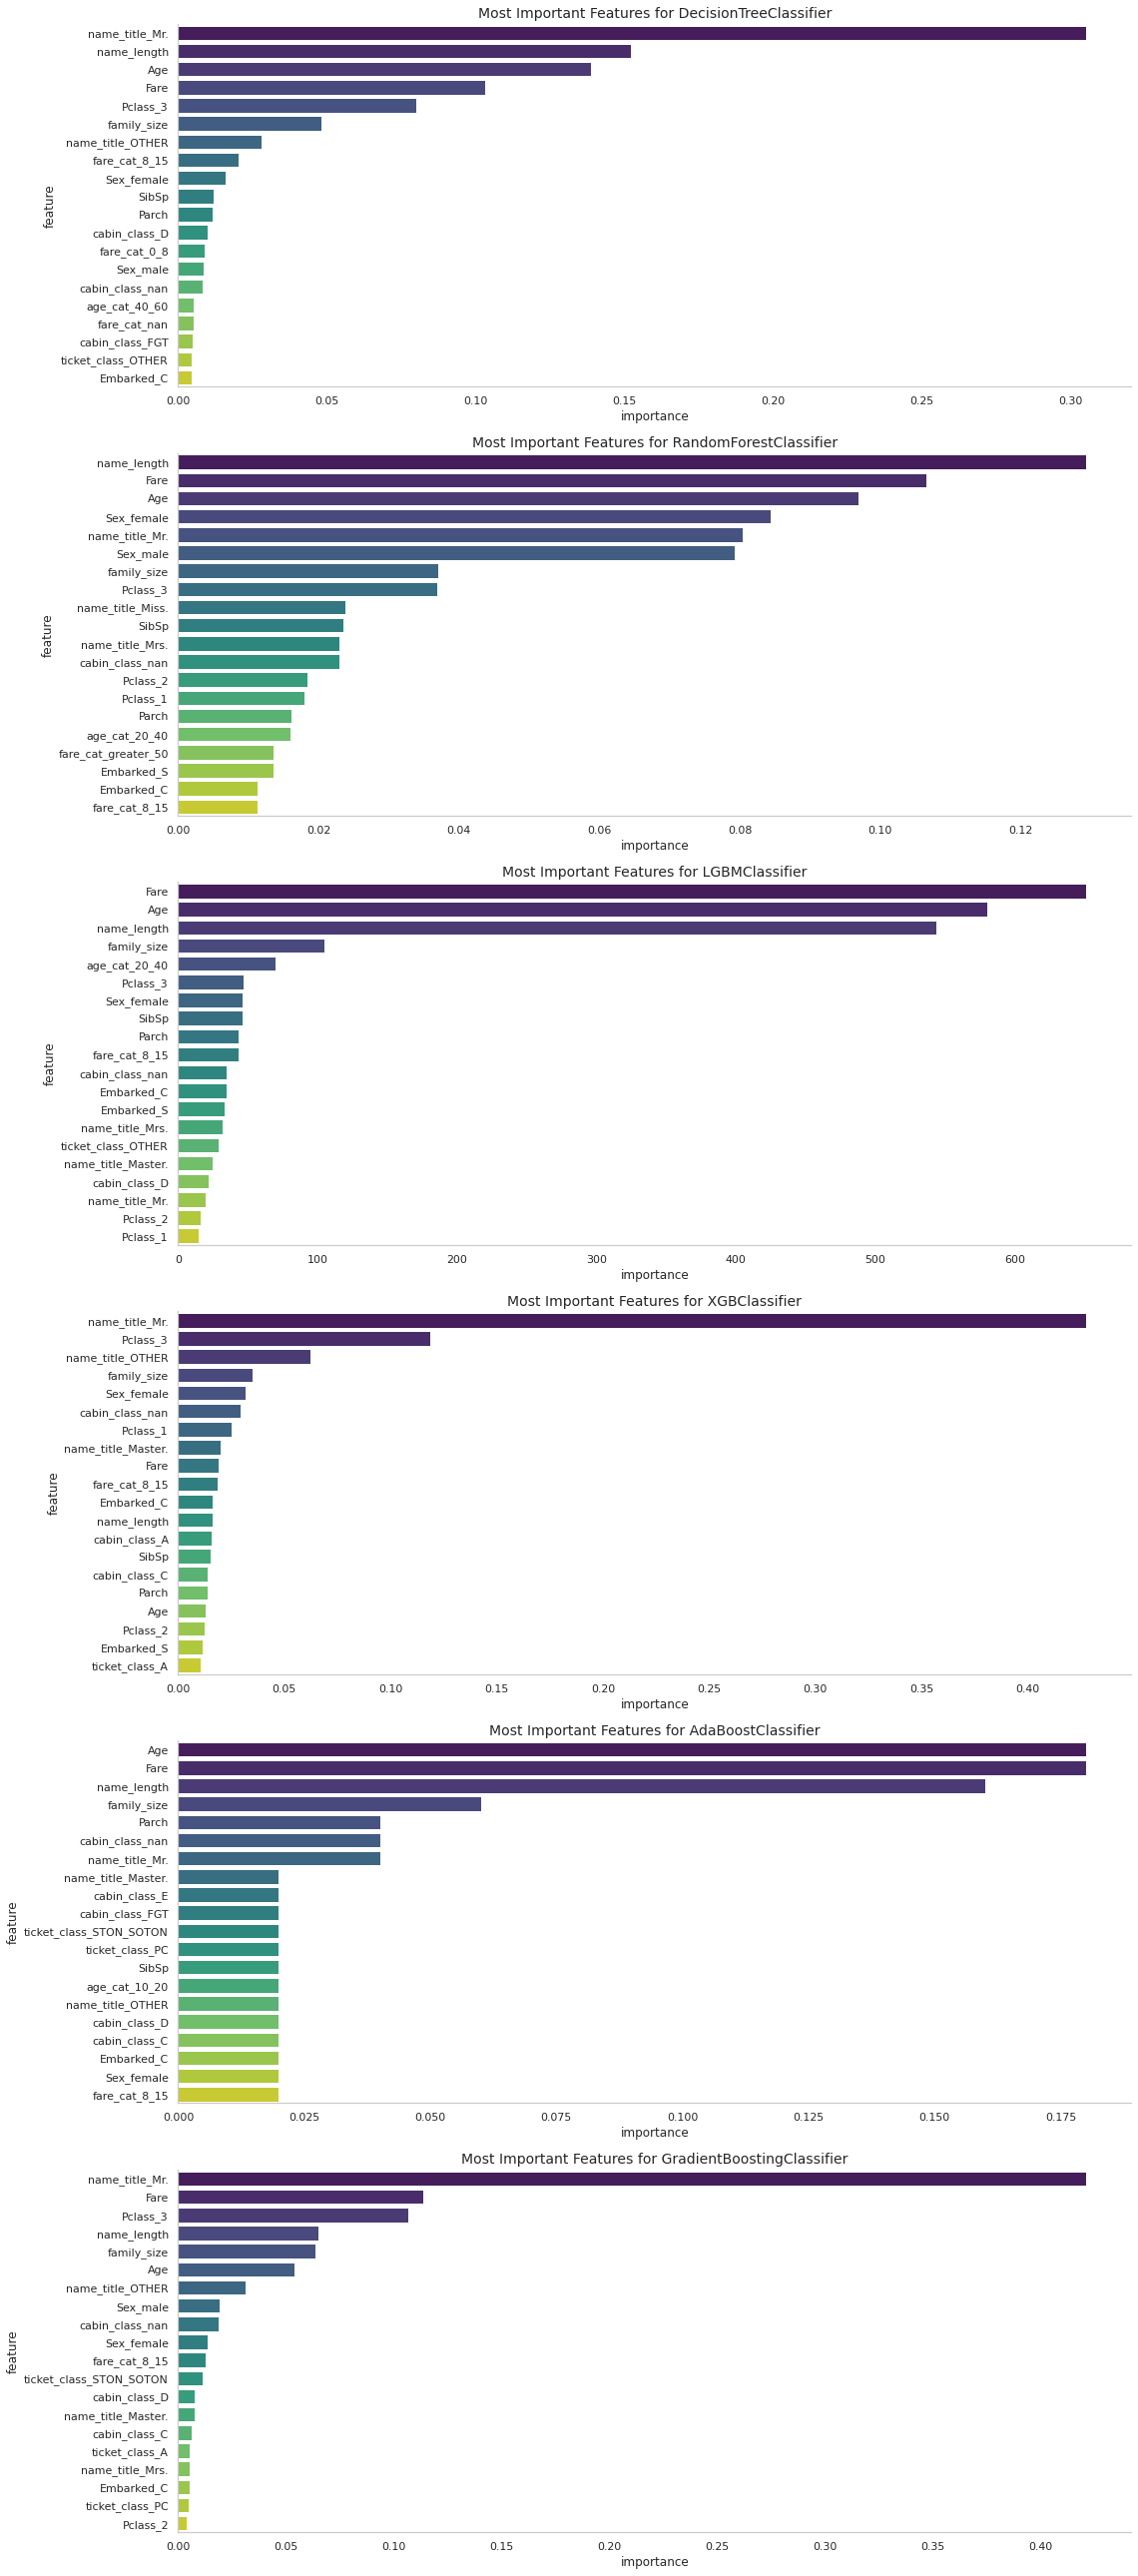

In [ ]:
# Feature importances
trainer.plot_feature_importance(features=MODEL_FEATURES)

- Analisando o log do método, percebe-se que o modelo $LogisticRegression$ não possui o método feature_importances_() e, assim, é impossível calcular e retornar esta frente para este modelo. Então, considerando os modelos DecisionTrees e RandomForest, os gráficos de barras acima indicam as principais características de maior relevância para prever a sobrevivência dos passageiros ao naufrágio do Titanic.

#### **Matriz de Confusão**

- Em modelos de classificação binária, é comum realizar análises individuais em Verdadeiros Positivos, Verdadeiros Negativos, Falsos Positivos e Falsos Negativos, ou seja, em basicamente todos os indicadores que compõem as principais métricas de classificação visualizadas anteriormente. Para isso, a ferramenta utilizada é a matriz de confusão, que, por sua vez, visa consolidar todos esses indicadores em formato de matriz visual.

- Para realizar esta análise, é possível executar o método **plot_confusion_matrix()** do objeto treinador. O resultado será dado por duas matrizes de confusão para cada modelo utilizado (uma para os dados de treinamento e outra para os dados de teste). Vamos ver:

DEBUG;2022-11-26 17:17:05;trainer.py;trainer;1068;Initializing confusion matrix plotting for the models
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Initializing confusion matrix plotting for the models
DEBUG;2022-11-26 17:17:05;trainer.py;trainer;1076;Returning training and validation data for DecisionTreeClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Returning training and validation data for DecisionTreeClassifier
DEBUG;2022-11-26 17:17:05;trainer.py;trainer;1089;Making predictions on training and validation data for DecisionTreeClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Making predictions on training and validation data for DecisionTreeClassifier
DEBUG;2022-11-26 17:17:05;trainer.py;trainer;1097;Creating a confusion matrix for DecisionTreeClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Creating a confusion matrix for DecisionTreeClassifier
INFO;2022-11-26 17:17:05;t

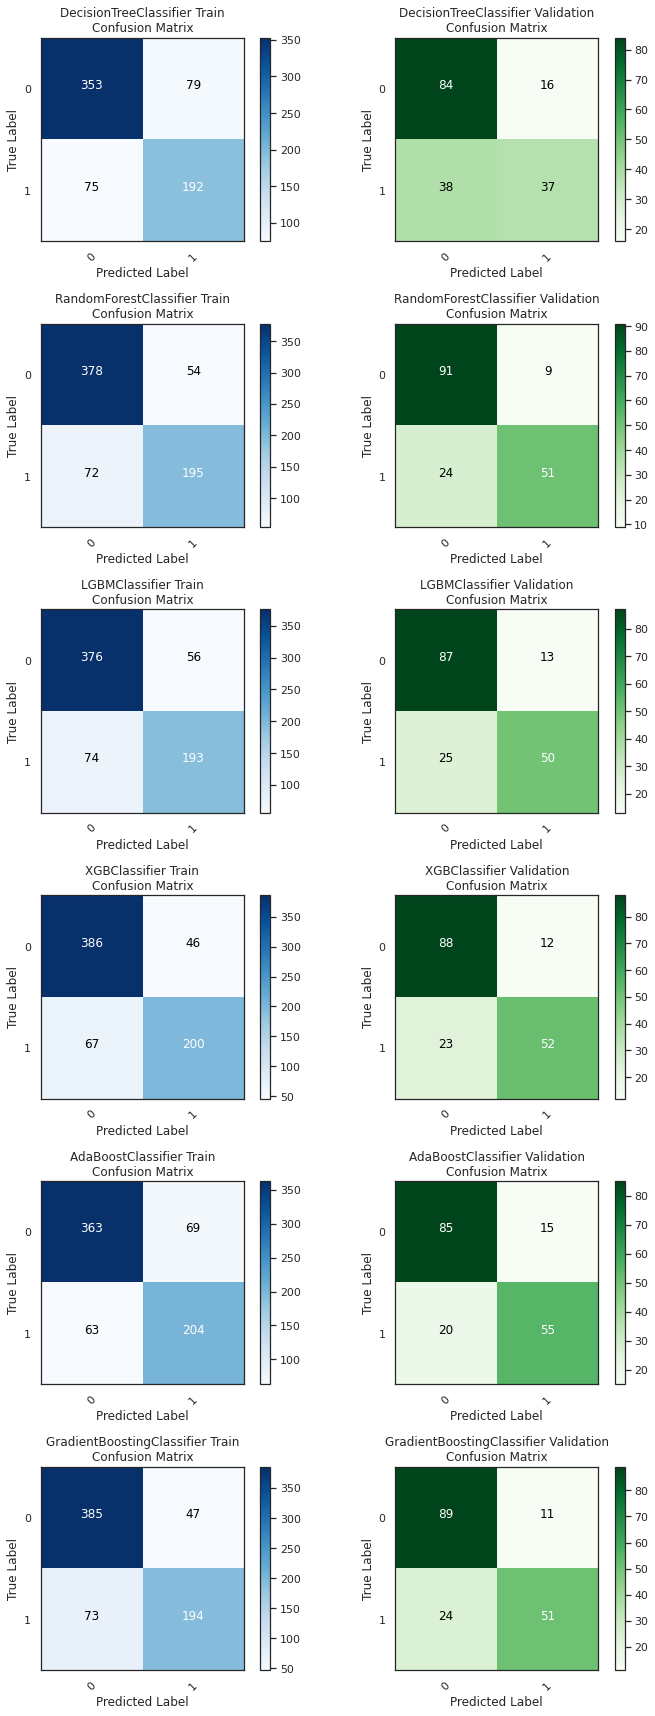

In [ ]:
# Plotando a matriz de confusão para os modelos
trainer.plot_confusion_matrix()

#### **Curva ROC**

- Em alguns casos, conjuntos de dados com uma variável alvo desbalanceada, ou seja, uma quantidade extremamente pequena de registros para uma determinada classe, podem apresentar vieses elevados para as métricas clássicas de avaliação de modelos de classificação. Assim, uma possível solução é analisar os resultados em termos de pontuação ou probabilidade em vez de métricas fixas.

- Nesses casos, é possível analisar a curva ROC dos modelos para verificar se eles estão tendo um bom desempenho diante do objetivo de negócio a ser alcançado. Para isso, podemos executar o método **plot_roc_curve()** do objeto trainer.

DEBUG;2022-11-26 17:18:54;trainer.py;trainer;1149;Initializing a ROC Curve analysis for trained models
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Initializing a ROC Curve analysis for trained models
DEBUG;2022-11-26 17:18:54;trainer.py;trainer;1155;Returning labels and training and validation scores for DecisionTreeClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Returning labels and training and validation scores for DecisionTreeClassifier
DEBUG;2022-11-26 17:18:54;trainer.py;trainer;1168;Computing FPR, TPR and AUC on training and validation for DecisionTreeClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Computing FPR, TPR and AUC on training and validation for DecisionTreeClassifier
DEBUG;2022-11-26 17:18:54;trainer.py;trainer;1181;Plotting the ROC Curves for DecisionTreeClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Plotting the ROC Curves for DecisionTreeClassifier
DEBU

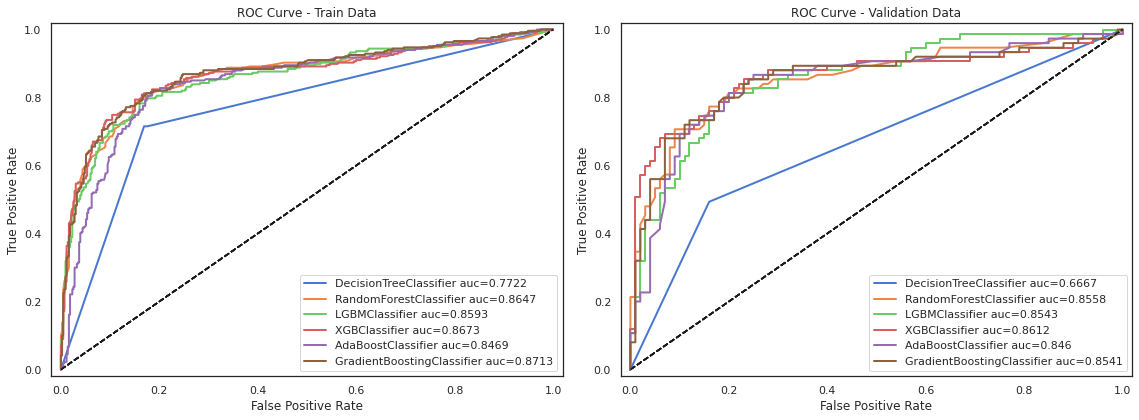

In [ ]:
# Gráfico da Curva ROC
trainer.plot_roc_curve()

- Analisando as curvas de treinamento e teste acima, bem como a métrica roc_auc (*Area Under the Curve*) na legenda de cada série, percebe-se que os modelos RandomForest e LogisticRegression apresentam melhor desempenho em relação ao modelo DecisionTrees. No futuro, se a métrica roc_auc se tornar o objetivo de otimização para esta tarefa, podemos levar em consideração a análise acima para decidir o melhor algoritmo.

#### **Distribuição de Probabilidades**

- Complementando as análises e comentários acima, em alguns casos é extremamente relevante observar como os escores (ou probabilidades) dos modelos se distribuem em relação ao todo. Tal análise é importante para verificar se os classificadores estão, de fato, separando bem as classes positivas e negativas, proporcionando assim uma visão clara dos possíveis erros em cada faixa de pontuação retornada.

- Esta visão pode ser retornada usando o método **plot_score_distribution()** do objeto trainer.

DEBUG;2022-11-26 17:22:29;trainer.py;trainer;1241;Initializing distribution score analysis for the models
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Initializing distribution score analysis for the models
DEBUG;2022-11-26 17:22:29;trainer.py;trainer;1250;Returning labels and trainind and validation score for DecisionTreeClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Returning labels and trainind and validation score for DecisionTreeClassifier
DEBUG;2022-11-26 17:22:29;trainer.py;trainer;1263;Plotting the score distribution chart for DecisionTreeClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Plotting the score distribution chart for DecisionTreeClassifier
DEBUG;2022-11-26 17:22:29;trainer.py;trainer;1250;Returning labels and trainind and validation score for RandomForestClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Returning labels and trainind and validation score for R

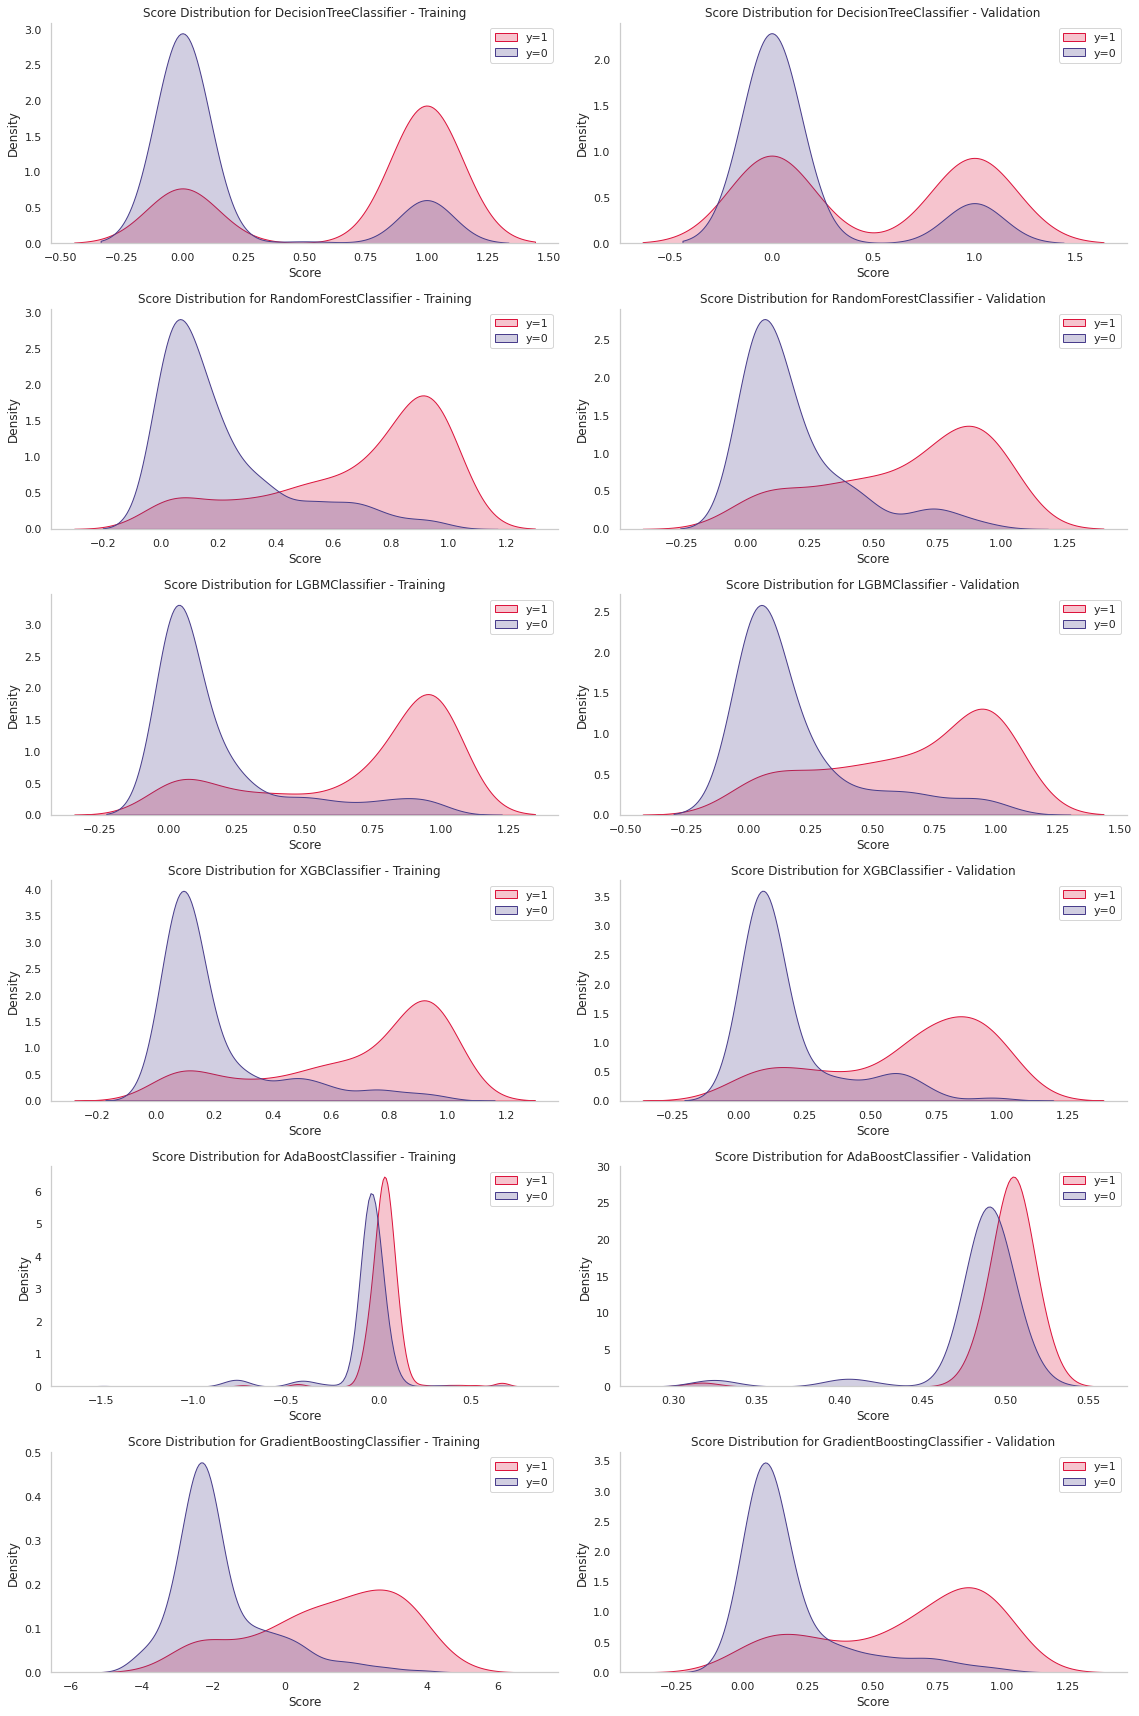

In [ ]:
# Gráfico da Distribuição dos Scores/Probabilidades
trainer.plot_score_distribution()

**Conclusões**:

- As curvas acima representam a distribuição dos escores de cada um dos modelos treinados, considerando os dados de treinamento e teste. A quebra pelas classes positivas e negativas presentes na base $(y = 1$ e $y = 0)$ indica como cada algoritmo realizou a separação dos escores e o quão bom cada um pode ser nessa diferenciação considerando a probabilidade de cada classe entre $0$ e $1$ .

- Na prática, as curvas são lidas pela densidade de elementos de cada uma das classes quando o escore de probabilidade está nos intervalos determinados pelo eixo $x$. Exemplificando pelas curvas do modelo RandomForest (última linha da figura), é possível perceber que, quando a probabilidade retornada pelo modelo está entre $0$ e $0,4$, há uma alta densidade de elementos da classe negativa (**curva azul**), o que é um bom sinal. Por outro lado, quando o modelo retorna altas probabilidades, a densidade de elementos da classe positiva é extremamente maior (**curva vermelha**).

#### **Distribuição de Probabilidades em Bins**

- Outra forma de analisar a distribuição do escore de probabilidade dos modelos é por meio de sua separação em faixas específicas de análise. Assim, é possível analisar a volumetria de cada faixa de pontuação considerando as diferentes classes presentes na base, abrindo a possibilidade de verificar, de fato, se os modelos estão separando as classes de forma discreta.

- Para isso, podemos utilizar o método **plot_score_bins()** do objeto trainer conforme imagem abaixo:

DEBUG;2022-11-26 17:26:50;trainer.py;trainer;1317;Initializing score analysis on categorical bins for trained models
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Initializing score analysis on categorical bins for trained models
DEBUG;2022-11-26 17:26:50;trainer.py;trainer;1330;Returning parameters for DecisionTreeClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Returning parameters for DecisionTreeClassifier
DEBUG;2022-11-26 17:26:50;trainer.py;trainer;1359;Plotting score distribution on bins for DecisionTreeClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Plotting score distribution on bins for DecisionTreeClassifier
DEBUG;2022-11-26 17:26:50;trainer.py;trainer;1378;Plotting percentual analysis on bins for DecisionTreeClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Plotting percentual analysis on bins for DecisionTreeClassifier
DEBUG;2022-11-26 17:26:50;trainer.py;trainer;133

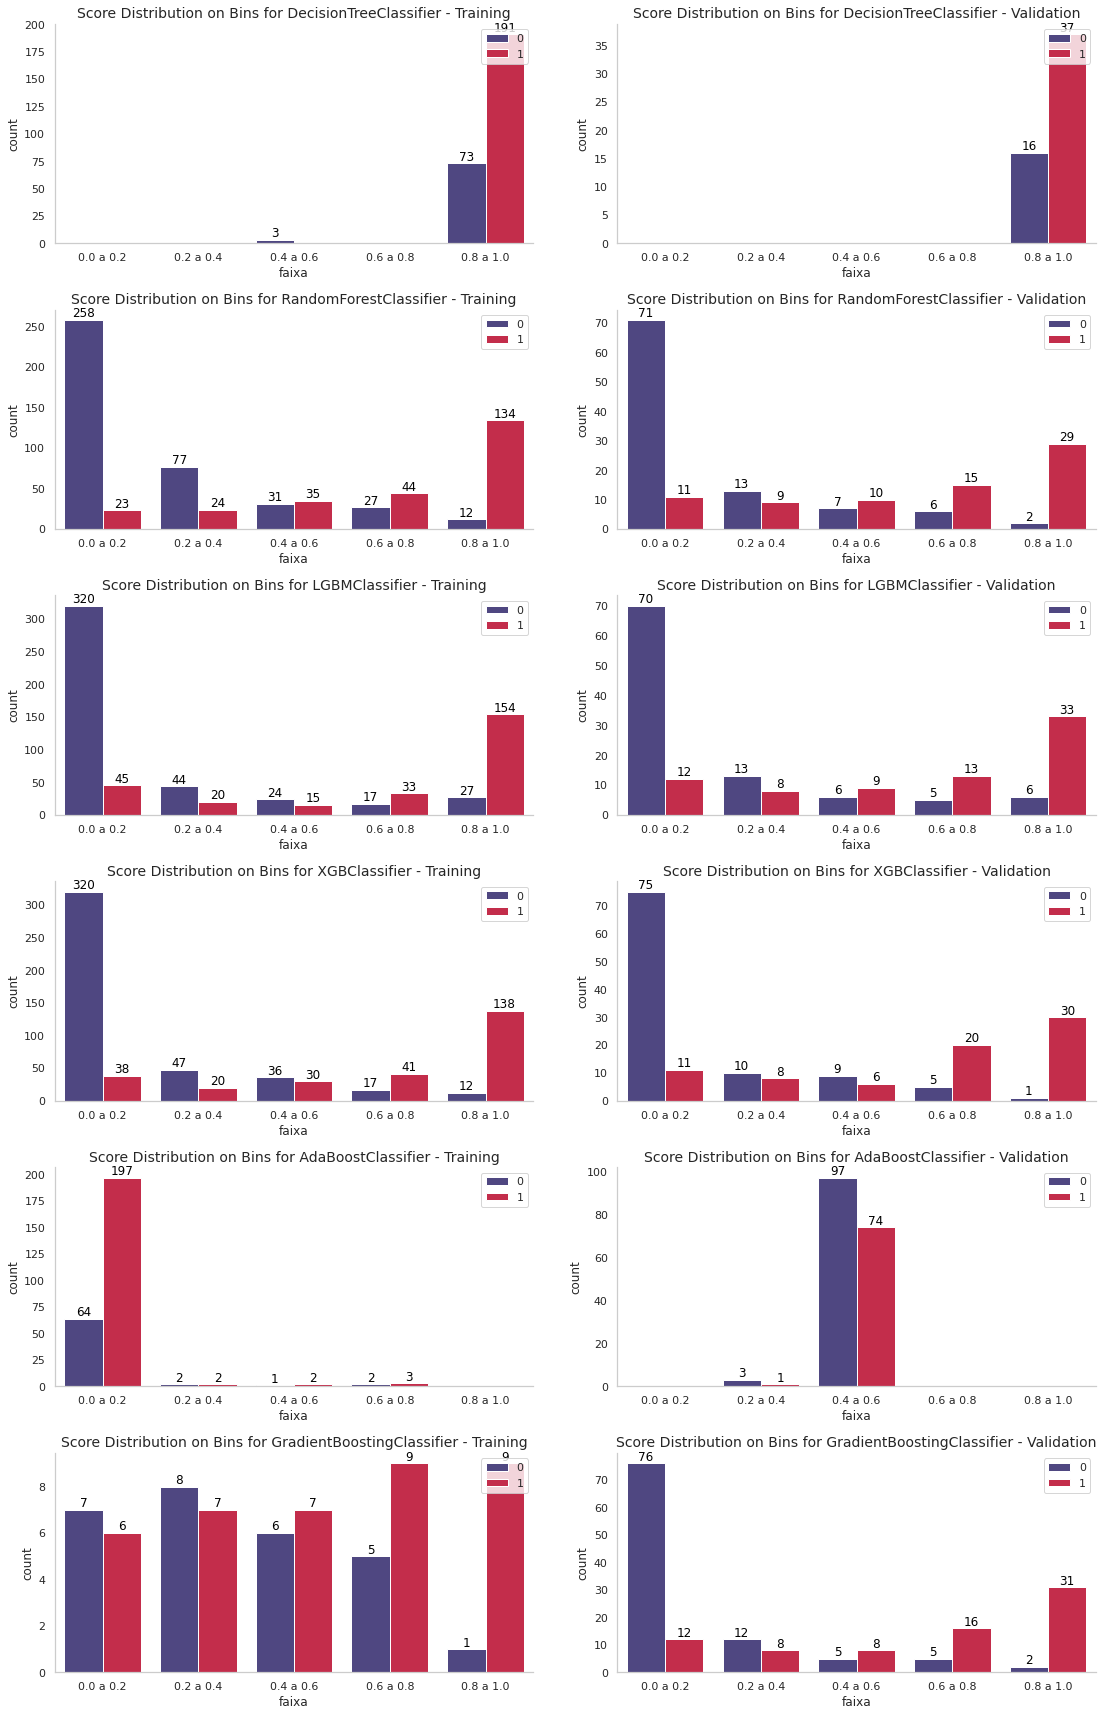

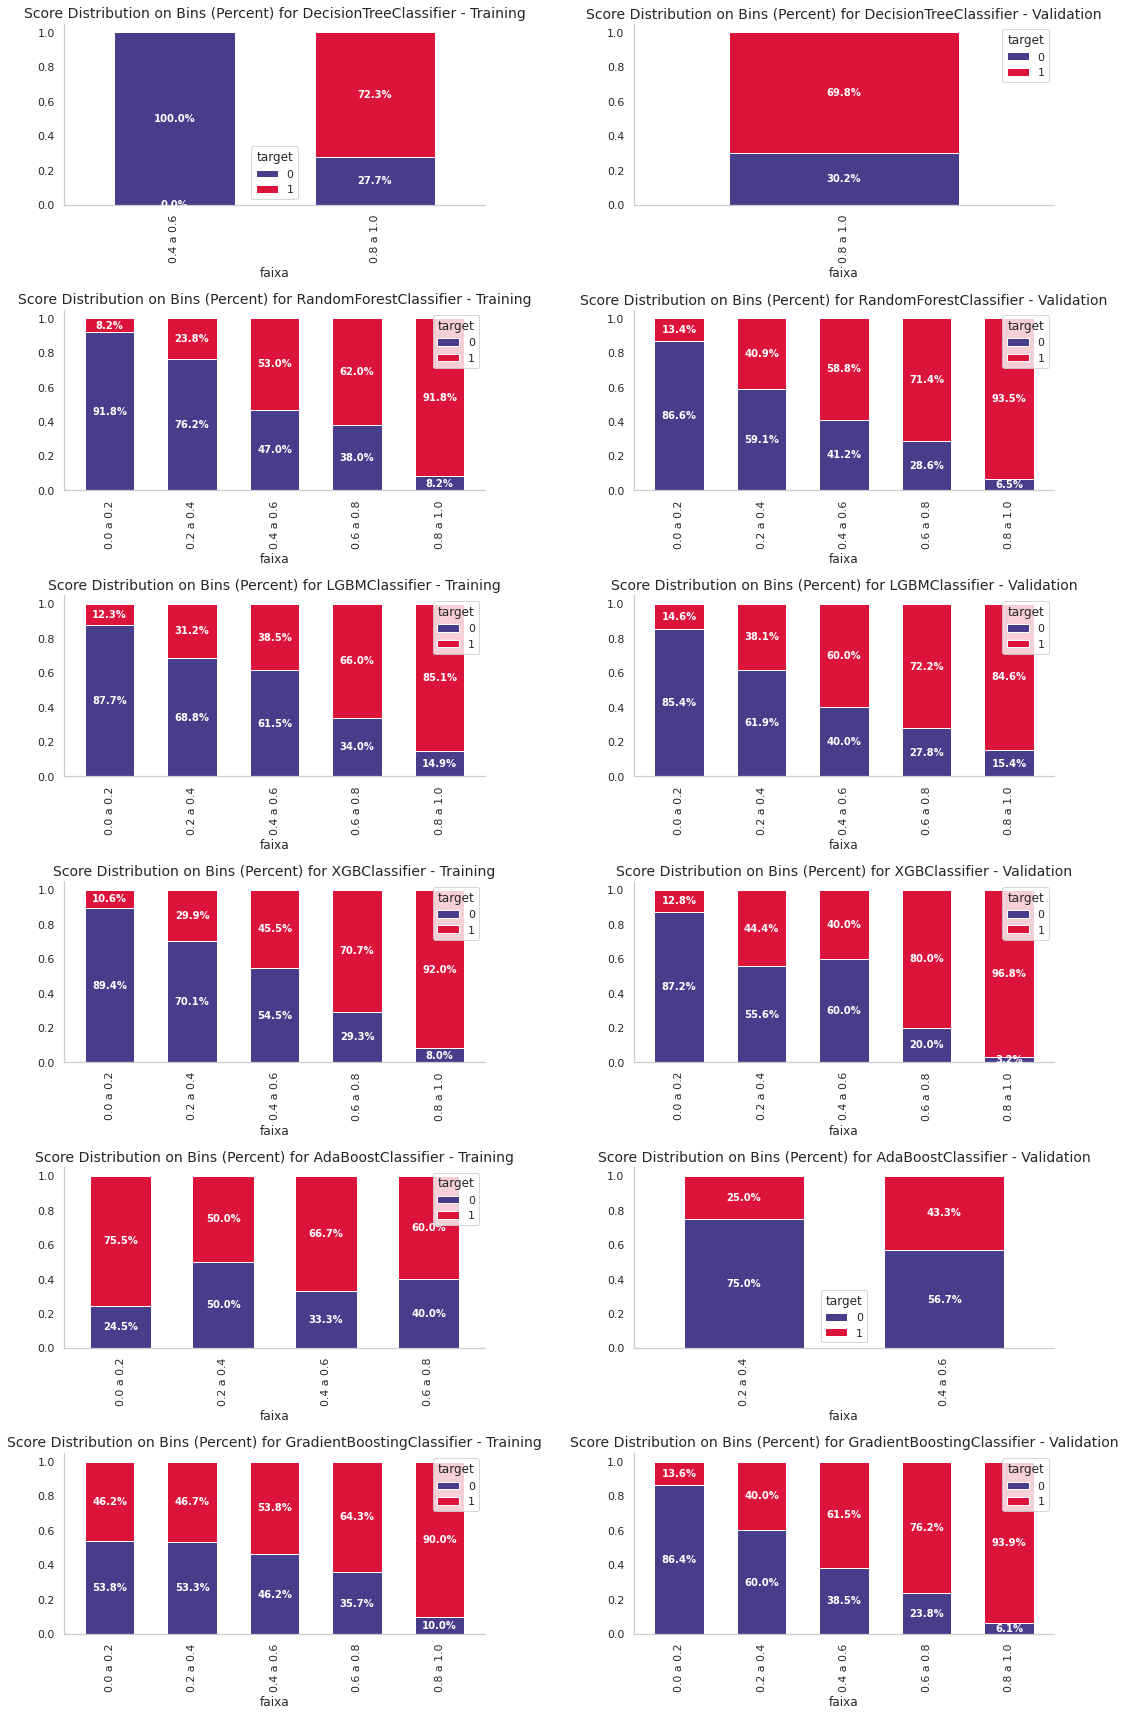

In [ ]:
# Gráfico da Distribuição de Probabilidades em Bins
trainer.plot_score_bins()

**Conclusão**:

- Como visto na distribuição contínua anteriormente, o objetivo desta análise de bandas também é verificar se os modelos estão separando classes de bandas adequadamente. Fazendo a regra do resultado para o modelo RandomForest *(linha inferior da figura)*, há um aumento no volume de registros pertencentes à classe positiva $(y = 1)$ conforme o crescimento das bandas do eixo $x$, indicando assim que altas os escores estão, em geral, relacionados à classe positiva *(cenário esperado)*.

#### **Curvas de Aprendizado**

- Uma ferramenta extremamente poderosa para verificar se os modelos utilizados sofrem de algum tipo de problema relacionado a viés ou variância **(underfitting ou overfitting)** são as "curvas de aprendizado". Com eles, é possível verificar a evolução dos erros obtidos pelos modelos, no treinamento e na validação, a partir de números específicos de amostras utilizadas para tais cálculos.

- Na prática, é definido um "passo" de evolução da amostra e, sequencialmente, o modelo é treinado usando um número $N +$ "passo" de amostras e seus respectivos erros são computados no treinamento e na validação. O resultado são curvas de evolução mostrando o comportamento do erro relacionado ao aumento do número de amostras utilizadas no cálculo. Para realizar esta análise, temos o método **plot_learning_curve()** do objeto treinador.

DEBUG;2022-11-26 17:31:27;trainer.py;trainer;1442;Initializing plots for learning curves for trained models
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Initializing plots for learning curves for trained models
DEBUG;2022-11-26 17:31:27;trainer.py;trainer;1450;Returning parameters for DecisionTreeClassifier and applying learning_curve method
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Returning parameters for DecisionTreeClassifier and applying learning_curve method
DEBUG;2022-11-26 17:31:29;trainer.py;trainer;1468;Plotting learning curves for training and validation data for DecisionTreeClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Plotting learning curves for training and validation data for DecisionTreeClassifier
DEBUG;2022-11-26 17:31:29;trainer.py;trainer;1450;Returning parameters for RandomForestClassifier and applying learning_curve method
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.

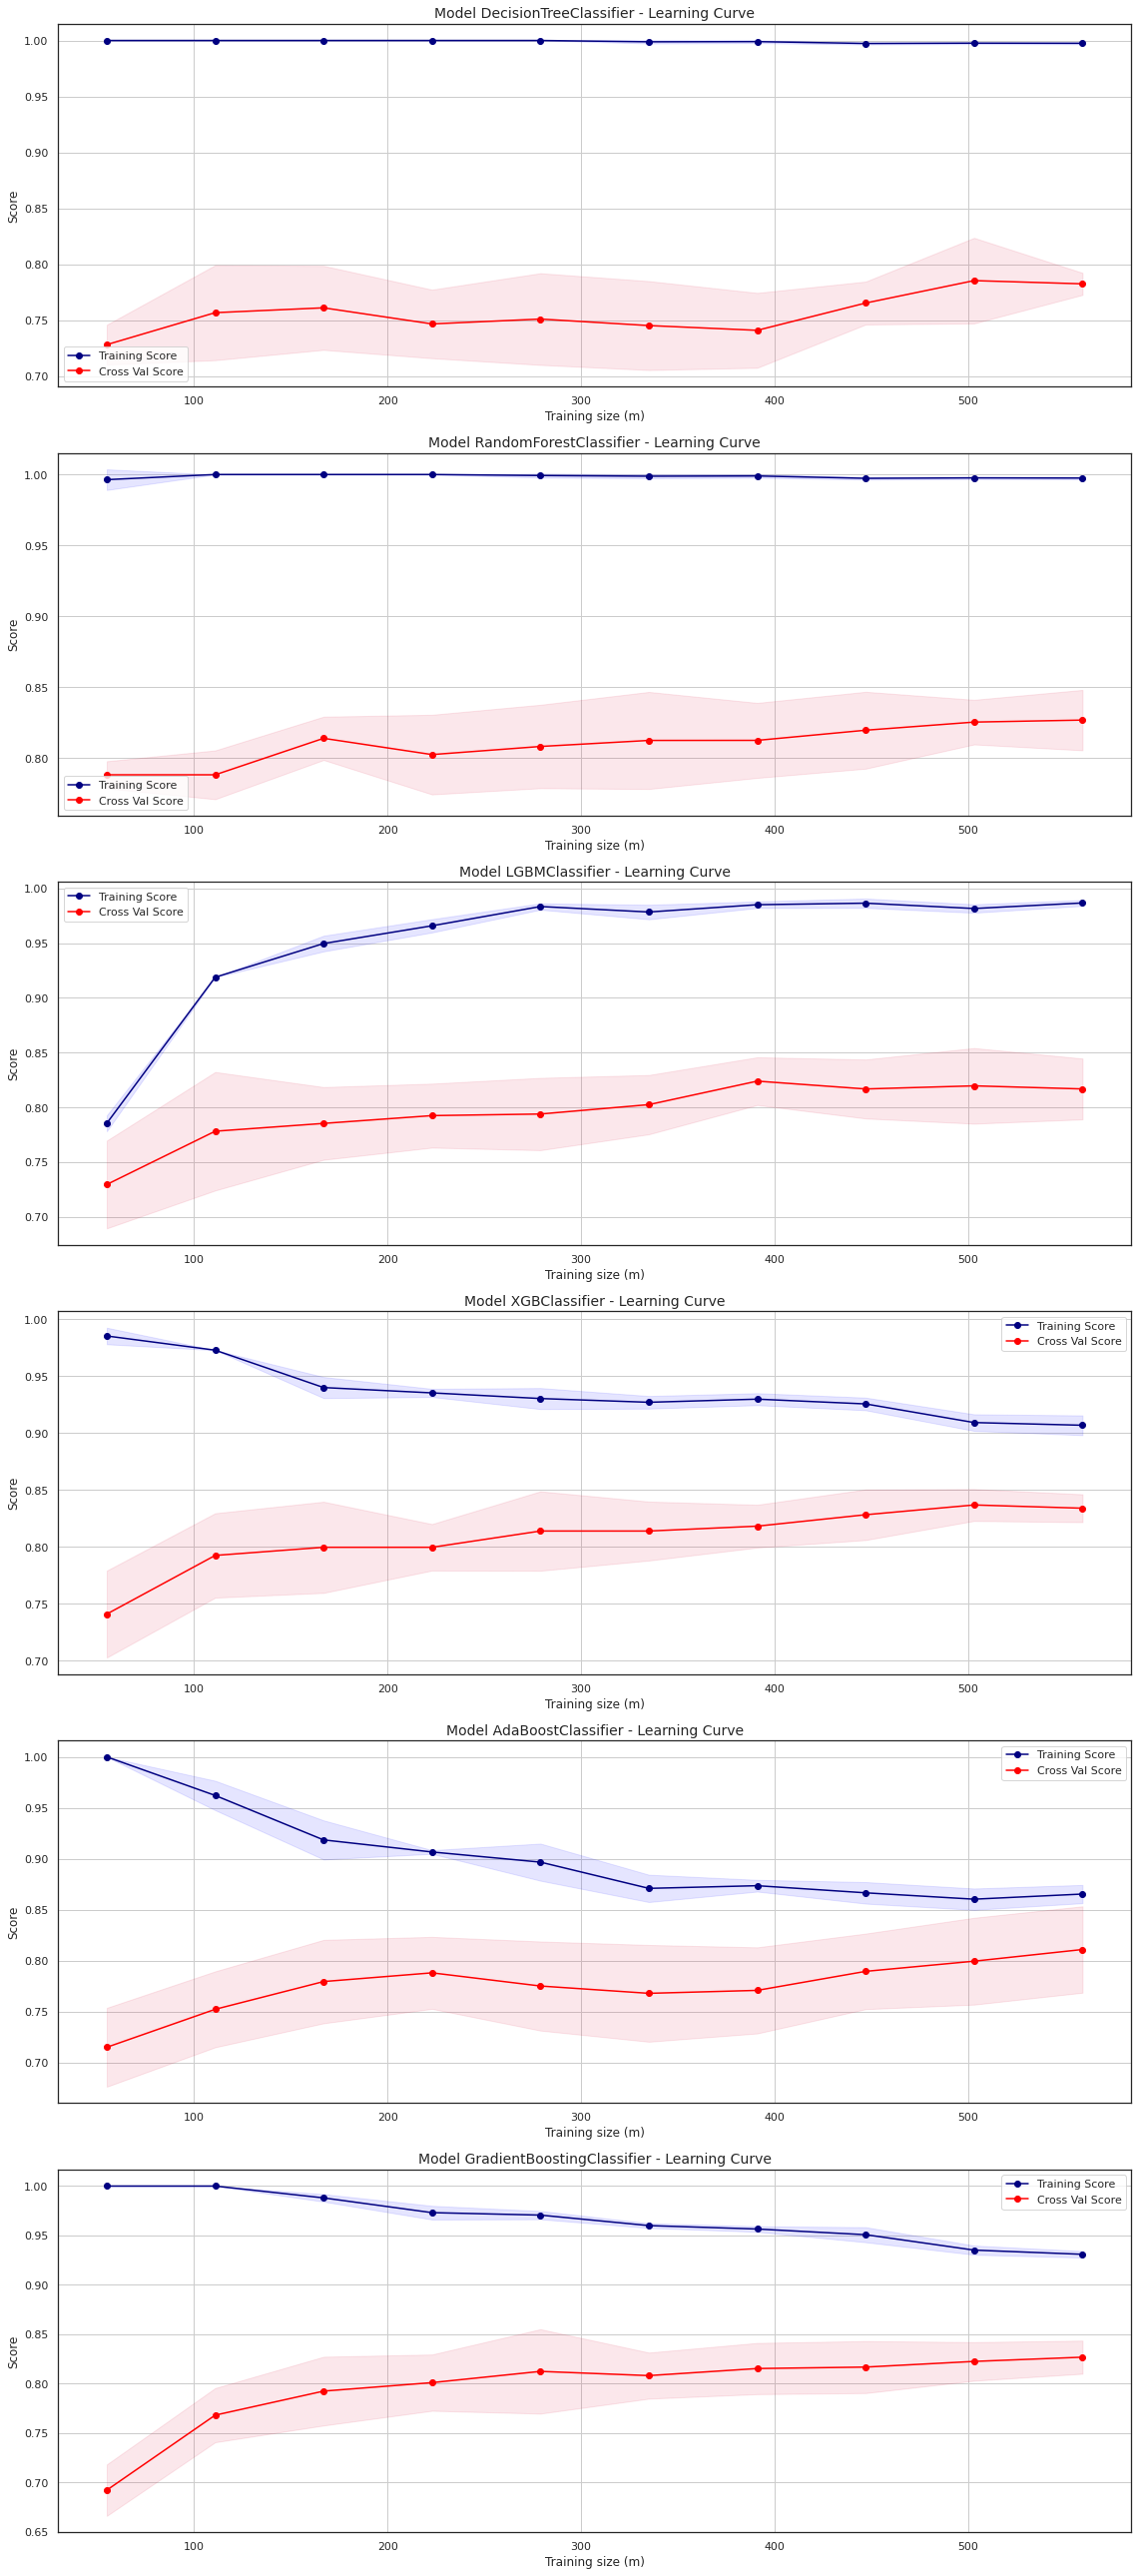

In [ ]:
# Gráfico da Curvas de Aprendizado
trainer.plot_learning_curve()

- Analisando as curvas, é possível concluir que os modelos não sofrem de problemas graves de overfitting, visto que o erro nos dados de treinamento e validação é muito semelhante ao final das $500$ amostras.

- Para analisar outros cenários possíveis, cesse o link de referência [Curva de Aprendizagem](https://www.dataquest.io/blog/learning-curves-machine-learning/).

#### **Análise usando a Biblioteca** $Shap$

- Por fim, concluindo o bloco de análise de desempenho dos modelos treinados, tem-se a análise de shap como uma forma poderosa de analisar o impacto de cada uma das features base em um dado modelo preditivo.

- Ao contrário da análise de importâncias de recursos realizada anteriormente, a análise que permite visualizar o impacto dos recursos de acordo com seu valor absoluto. Em outras palavras, pode-se ver se um valor alto (ou extremamente baixo) para um determinado recurso pode impactar significativamente a saída do modelo.

- Para esta rica análise, podemos utilizar o método **plot_shap_analysis()** do objeto trainer, passando como argumento principal o nome de um modelo já treinado pela classe e presente no atributo classifiers_info.

DEBUG;2022-11-26 17:38:57;trainer.py;trainer;1525;Explaining LGBMClassifier through a violin plot on shap analysis
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Explaining LGBMClassifier through a violin plot on shap analysis
DEBUG;2022-11-26 17:38:57;trainer.py;trainer;1533;Returning paramteres for LGBMClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Returning paramteres for LGBMClassifier
DEBUG;2022-11-26 17:38:57;trainer.py;trainer;1543;Creating a explainer and generating shap values for LGBMClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Creating a explainer and generating shap values for LGBMClassifier
DEBUG;2022-11-26 17:38:58;trainer.py;trainer;1556;Making a shap analysis violin plot for LGBMClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Making a shap analysis violin plot for LGBMClassifier


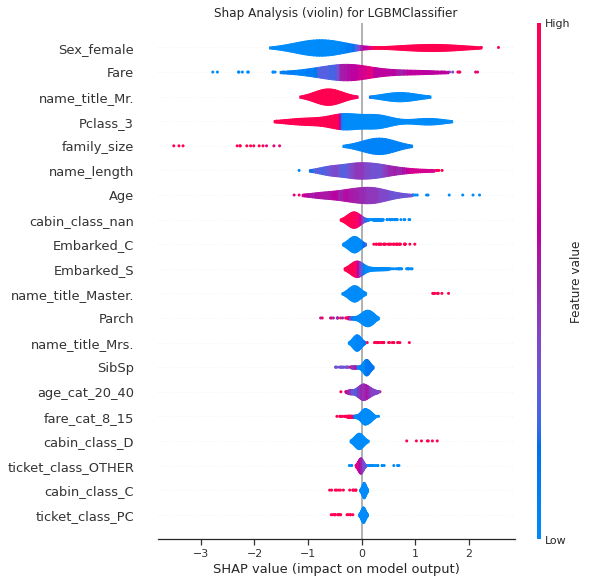

In [ ]:
# Anaálise Shap
trainer.plot_shap_analysis(model_name='LGBMClassifier', features=MODEL_FEATURES)

**Conclusão**

- Conforme mencionado anteriormente, a análise $Shap$ permite cruzar o valor de cada recurso e seu respectivo valor na resposta final do modelo.

- Como exemplo de leitura, o resultado obtido para a variável **Sex_male** indica que quanto maior seu valor *(mancha vermelha)*, menor seu impacto no resultado do modelo (lado esquerdo do eixo $x$).

- Em uma análise mais técnica e resumida, é possível dizer que quanto maior o valor de **Sex_male** *(ou seja, quanto mais próximo do gênero masculino)*, menor o valor da probabilidade *(baixa chance de sobrevivência)*.

- Da mesma forma, a leitura da variável **Sex_female** indica o contrário:

 - As passageiras do sexo feminino tiveram maior chance de sobrevivência, o que, aliás, foi investigado e levantado na fase exploratória.

### **Fluxo de Treinamento e Análise Visual**

- Ao longo de todo o projeto, e principalmente nesta sessão de modelagem, foram utilizadas as poderosas ferramentas do pacote $mlcomposer$, permitindo assim uma análise rápida e rica dos modelos, desde o treinamento até a avaliação de desempenho e diversos outros parâmetros relevantes para uma decisão mais assertiva sobre o melhor modelo para uma determinada tarefa.

- Foram construídos dentro da classe classifierBinary dois métodos responsáveis ​​por realizar todos os passos acima de forma consolidada. Eles são: **training_flow()** e **visual_analysis()**. A grande diferença se deve à necessidade de informar apenas alguns argumentos essenciais para que seja realizado o treinamento, avaliação e geração de gráficos de análise. Os resultados podem ser salvos em diretórios específicos definidos pelo usuário.

Na célula abaixo, simularemos a execução desses dois métodos.

In [ ]:
# Criando um novo objeto
full_trainer = BinaryClassifier()

# Treinando e avaliando modelos de uma só vez
full_trainer.training_flow(set_classifiers, X_train_prep, y_train, X_val_prep, y_val,
                           features=MODEL_FEATURES, random_search=True, scoring='accuracy', n_jobs=3)

# Gerando análise visual para os modelos de uma só vez
full_trainer.visual_analysis(features=MODEL_FEATURES, model_shap='LGBMClassifier')

DEBUG;2022-11-26 17:48:11;trainer.py;trainer;410;Training model DecisionTreeClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Training model DecisionTreeClassifier
DEBUG;2022-11-26 17:48:11;trainer.py;trainer;430;Applying RandomizedSearchCV
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Applying RandomizedSearchCV
DEBUG;2022-11-26 17:48:12;trainer.py;trainer;445;Saving model file for DecisionTreeClassifier on pkl format
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Saving model file for DecisionTreeClassifier on pkl format
WARNING;2022-11-26 17:48:12;trainer.py;trainer;287;Path /content/output/models not exists. Creating directory on the path
DEBUG;2022-11-26 17:48:12;trainer.py;trainer;294;Saving pkl file on directory
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Saving pkl file on directory
DEBUG;2022-11-26 17:48:12;trainer.py;trainer;410;Training model RandomForestClassifier
DEBUG:/usr/local/li

- Após executar os métodos **training_flow()** e **visual_analysis()** especificados acima, há uma série de saídas geradas que podem ser acessadas futuramente para uma análise mais detalhada.

## **Ajuste de Hiperparâmetros**

- Após um longo percurso exploratório e de preparação na base de dados disponível para esta tarefa, temos inputs suficientes para decidir entre alguns modelos candidatos de forma a propor uma melhoria nos seus desempenhos através da afinação de hiperparâmetros.

- Até o momento, o treinamento foi realizado considerando uma configuração 'padrão' em todos os algoritmos, o que, de fato, não permite extrair todo o potencial do modelo. Nesta etapa, vamos separar alguns modelos candidatos que apresentaram desempenho razoável nesta etapa inicial ou que, de certa forma, podem apresentar uma proposta promissora após o ajuste de hiperparâmetros. Após essa análise inicial, os dicionários de busca serão definidos considerando hiperparâmetros específicos para cada um desses modelos pré-selecionados. Ao final, será proposta uma análise completa, através do RandomizedSearchCV para encontrar a melhor combinação entre todas as combinações possíveis dos modelos candidatos.

Assim, revisaremos os resultados obtidos pelos modelos.

In [ ]:
# Metricas dos Modelos
metrics = pd.read_csv('output/metrics/metrics.csv')
metrics

,model,approach,acc,precision,recall,f1,auc,total_time,anomesdia_datetime
0,DecisionTreeClassifier,Train 5 K-folds,0.7740,0.7190,0.7267,0.7113,0.7744,0.117,2022-11-26 17:48:31.931663
1,DecisionTreeClassifier,Validation,0.7200,0.7500,0.5200,0.6142,0.6950,0.006,2022-11-26 17:48:31.931663
2,RandomForestClassifier,Train 5 K-folds,0.8126,0.7830,0.7120,0.7641,0.8658,4.940,2022-11-26 17:48:31.931663
3,RandomForestClassifier,Validation,0.8000,0.8333,0.6667,0.7407,0.8489,0.034,2022-11-26 17:48:31.931663
4,LGBMClassifier,Train 5 K-folds,0.8140,0.7774,0.7230,0.7478,0.8593,1.132,2022-11-26 17:48:31.931663
5,LGBMClassifier,Validation,0.7829,0.7937,0.6667,0.7246,0.8543,0.010,2022-11-26 17:48:31.931663
6,XGBClassifier,Train 5 K-folds,0.8384,0.8137,0.7491,0.7797,0.8673,2.226,2022-11-26 17:48:31.931663
7,XGBClassifier,Validation,0.8000,0.8125,0.6933,0.7482,0.8612,0.017,2022-11-26 17:48:31.931663
8,AdaBoostClassifier,Train 5 K-folds,0.8111,0.7486,0.7637,0.7556,0.8469,2.681,2022-11-26 17:48:31.931663
9,AdaBoostClassifier,Validation,0.8000,0.7857,0.7333,0.7586,0.8460,0.034,2022-11-26 17:48:31.931663


- Em um balanço geral, considerando a precisão como objetivo de otimização, é possível considerar os modelos **RandomForest**, **LightGBM** e **XGBoost** como bons candidatos para o ajuste de hiperparâmetros.

- Na prática, existe uma boa possibilidade de melhoria de desempenho para esses modelos e, assim, construiremos alguns blocos capazes de nos auxiliar nessa busca e aprimoramento.

- O primeiro passo a ser dado é a definição de dicionários contendo os hiperparâmetros de busca para cada um dos modelos selecionados. Com esse dicionário em mãos, vamos construir um novo pipeline com:

  - *Preparação de dados com prep_pipeline*;

  - *Aplicação de seleção de características com FeatureSelection*;

  - *Modelo de treinamento*.

- Assim, será possível utilizar os dicionários de hiperparâmetros para aplicar uma busca aleatória a fim de retornar a melhor combinação possível, seja em relação aos parâmetros de modelagem ou aos parâmetros de preparação de base (como a estratégia do imputador, a aplicação da transformação logarítmica, o número de características a serem consideradas, entre outros).

#### **Criando o Dicionários dos Hiperparametros**

In [ ]:
# Parâmetros de busca pro modelo RandomForest
forest_tunning_grid = {
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 6, 7, 9, 10],
    #'max_features': [None, 'auto', 'sqrt', 'log2'],
    #'max_leaf_nodes': np.arange(3, 50, 2),
    #'min_impuriti_decrease': np.linspace(0, 1, 50),
    #'min_samples_leaf': np.arange(1, 100, 1),
    #'min_samples_split': np.arange(2, 100, 1),
    #'min_weight_fraction_leaf': np.linspace(0, 1, 50),
    'n_estimators': np.arange(300, 600, 50),
    #'oob_score': [True, False],
    'random_state': [42]
}

# Parâmetros de busca pro modelo LightGBM
lgbm_tunning_grid = {
    'boosting_type': ['gbdt'],
    'class_weight': [None, 'balanced'],
    #'colsample_bytree': np.linspace(.5, 1, 50),
    #'importance_type': ['split', 'gain'],
    'learning_rate': [0.003, 0.01, 0.03, 0.1, 0.3, 1, 3],
    'max_depth': np.arange(-1, 100, 2),
    #'min_child_samples': np.arange(10, 50, 1),
    #'min_child_weight': np.linspace(1e-4, 1, 100),
    'n_estimators': np.arange(300, 700, 50),
    'num_leaves': [5, 10, 15, 20],
    'objective': ['binary'],
    'random_state': [42],
    'reg_alpha': np.linspace(.0, 25, 15)
}

# Parâmetros de busca pro modelo XGBoost
xgboost_tunning_grid = {
    #'base_score': np.linspace(0.3, 0.7, 50),
    'booster': ['gbtree'],
    'max_depth': [3, 4, 6, 7],
    'learning_rate': [0.003, 0.01, 0.03, 0.1, 0.3, 1, 3],
    'n_estimators': np.arange(300, 700, 50),
    'objective': ['binary:logistic'],
    'seed': [42],
    'reg_alpha': np.linspace(.0, 25, 15),
    'reg_lambda': np.linspace(.0, 25, 15),
    'colsample_bylevel': [0.5, 0.7, 0.9]
}

# Parâmetros de busca pro modelo AdaBoost
adaboost_tunning_grid = {
    'base_estimator': [DecisionTreeClassifier(max_depth=7)],
    'n_estimators': np.arange(50, 700, 50),
    'learning_rate': [0.003, 0.01, 0.03, 0.1, 0.3, 1, 3],
    'algorithm': ['SAMME', 'SAMME.R'],
    'random_state': [42]
}

# Parâmetros de busca pro modelo GradientBoost
gradboost_tunning_grid = {
    'n_estimators': np.arange(50, 700, 50),
    'max_depth': [3, 6, 7, 8, 9, 10, 15],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_leaf_nodes': np.arange(3, 50, 2),
    #'min_impuriti_decrease': np.linspace(0, 1, 50),
    #'min_samples_leaf': np.arange(1, 100, 1),
    #'min_samples_split': np.arange(2, 100, 1),
    #'min_weight_fraction_leaf': np.linspace(0, 1, 50),
    'random_state': [42]
}

In [ ]:
import time
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import roc_auc_score
from datetime import datetime

def clf_cv_performance(model, X, y, cv=5, model_name=None):
    """
    Função responsável por calcular as principais métricas de um modelo de classificação
    utilizando validação cruzada

    Parâmetros
    ----------
    :param model: estimator do modelo preditivo [type: estimator]
    :param X: dados de entrada do modelo [type: np.array]
    :param y: array de target do modelo [type: np.array]
    :param cv: número de k-folds utilizado na validação cruzada [type: int, default=5]

    Retorno
    -------
    :return df_performance: DataFrame contendo as principais métricas de classificação [type: pd.DataFrame]

    Aplicação
    ---------
    results = clf_cv_performance(model=model, X=X, y=y)
    """

    # Computing metrics using cross validation
    t0 = time.time()
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()
    precision = cross_val_score(model, X, y, cv=cv, scoring='precision').mean()
    recall = cross_val_score(model, X, y, cv=cv, scoring='recall').mean()
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1').mean()

    # Probas for calculating AUC
    try:
        y_scores = cross_val_predict(model, X, y, cv=cv, method='decision_function')
    except:
        # Tree based models don't have 'decision_function()' method, but 'predict_proba()'
        y_probas = cross_val_predict(model, X, y, cv=cv, method='predict_proba')
        y_scores = y_probas[:, 1]
    auc = roc_auc_score(y, y_scores)

    # Creating a DataFrame with metrics
    t1 = time.time()
    delta_time = t1 - t0
    train_performance = {}
    if model_name is None:
        train_performance['model'] = model.__class__.__name__
    else:
        train_performance['model'] = model_name
    train_performance['approach'] = 'Final Model'
    train_performance['acc'] = round(accuracy, 4)
    train_performance['precision'] = round(precision, 4)
    train_performance['recall'] = round(recall, 4)
    train_performance['f1'] = round(f1, 4)
    train_performance['auc'] = round(auc, 4)
    train_performance['total_time'] = round(delta_time, 3)
    df_performance = pd.DataFrame(train_performance, index=train_performance.keys()).reset_index(drop=True).loc[:0, :]

    # Adding information of measuring and execution time
    cols_performance = list(df_performance.columns)
    df_performance['anomesdia'] = datetime.now().strftime('%Y%m%d')
    df_performance['anomesdia_datetime'] = datetime.now()
    df_performance = df_performance.loc[:, ['anomesdia', 'anomesdia_datetime'] + cols_performance]

    return df_performance

In [ ]:
# Importing libraries
from mlcomposer.transformers import FeatureSelection
#from pycomp.ml.trainer import clf_cv_performance
from sklearn.model_selection import RandomizedSearchCV

# Preparing variables for a complete search
tunning_models_keys = ['RandomForestClassifier', 'LGBMClassifier', 'XGBClassifier', 'AdaBoostClassifier',
                       'GradientBoostingClassifier']
tunning_param_grids = [forest_tunning_grid, lgbm_tunning_grid, xgboost_tunning_grid, adaboost_tunning_grid,
                       gradboost_tunning_grid]
tunned_pipelines = {}
general_metrics = pd.DataFrame({})
pipe_model_key = 'model'

# Preparing dataset for training (train + validation)
X = X_train.append(X_val)
y = np.concatenate((y_train, y_val))

# Iterating over each model and param grid
for model_name, param_grid in zip(tunning_models_keys, tunning_param_grids):

    # Returning informations about the model
    baseline_model = trainer.get_estimator(model_name)
    feature_importance = baseline_model.feature_importances_
    general_metrics = general_metrics.append(trainer.get_metrics(model_name))

    # Creating a pipeline for preparation and prediction
    tunning_pipeline = Pipeline([
        ('prep', prep_pipeline),
        ('selector', FeatureSelection(feature_importance, k=len(MODEL_FEATURES))),
        (pipe_model_key, baseline_model)
    ])

    # Preparing model grid for joining with pipeline grid
    model_param_grid = {pipe_model_key + '__' + k: v for k, v in param_grid.items()}
    tunning_param_grid = {
        'prep__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
        'prep__num__log_transformer__application': [True, False],
        'prep__num__scaler__scaler_type': [None, 'Standard', 'MinMax'],
        'selector__k': np.arange(5, len(MODEL_FEATURES) + 1, 2)
    }
    tunning_param_grid.update(model_param_grid)

    # Applying search with RandomizedSearch
    tunning_search = RandomizedSearchCV(tunning_pipeline, tunning_param_grid, scoring='accuracy', cv=5,
                                        n_jobs=-1, verbose=-1, random_state=42)
    tunning_search.fit(X, y)
    print(f'\nBest hyperparameters for {model_name} found by RandomizedSearch:\n')
    for k, v in tunning_search.best_params_.items():
        print(f'{k}: {v}')

    # Returning objects for the best combination found
    final_pipeline = tunning_search.best_estimator_
    tunned_pipelines[model_name] = final_pipeline

    # Computing metrics with the best combination pipeline
    final_metrics = clf_cv_performance(final_pipeline, X, y, model_name=model_name)
    model_metrics = trainer.get_metrics(model_name=model_name)
    metrics_cols = general_metrics.columns
    final_metrics = final_metrics.loc[:, metrics_cols]
    general_metrics = general_metrics.append(final_metrics)

# Final result
general_metrics

DEBUG;2022-11-26 18:03:45;trainer.py;trainer;1666;Returning estimator for model RandomForestClassifier stored on class attribute
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Returning estimator for model RandomForestClassifier stored on class attribute
DEBUG;2022-11-26 18:03:45;trainer.py;trainer;1691;Returning metrics computed for RandomForestClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Returning metrics computed for RandomForestClassifier



Best hyperparameters for RandomForestClassifier found by RandomizedSearch:

selector__k: 47
prep__num__scaler__scaler_type: None
prep__num__log_transformer__application: False
prep__num__imputer__strategy: most_frequent
model__random_state: 42
model__n_estimators: 450
model__max_depth: 6
model__criterion: entropy
model__class_weight: None
model__bootstrap: True


DEBUG;2022-11-26 18:04:37;trainer.py;trainer;1691;Returning metrics computed for RandomForestClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Returning metrics computed for RandomForestClassifier
DEBUG;2022-11-26 18:04:37;trainer.py;trainer;1666;Returning estimator for model LGBMClassifier stored on class attribute
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Returning estimator for model LGBMClassifier stored on class attribute
DEBUG;2022-11-26 18:04:37;trainer.py;trainer;1691;Returning metrics computed for LGBMClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Returning metrics computed for LGBMClassifier



Best hyperparameters for LGBMClassifier found by RandomizedSearch:

selector__k: 11
prep__num__scaler__scaler_type: Standard
prep__num__log_transformer__application: True
prep__num__imputer__strategy: mean
model__reg_alpha: 1.7857142857142858
model__random_state: 42
model__objective: binary
model__num_leaves: 10
model__n_estimators: 400
model__max_depth: 69
model__learning_rate: 0.1
model__class_weight: None
model__boosting_type: gbdt


DEBUG;2022-11-26 18:04:42;trainer.py;trainer;1691;Returning metrics computed for LGBMClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Returning metrics computed for LGBMClassifier
DEBUG;2022-11-26 18:04:42;trainer.py;trainer;1666;Returning estimator for model XGBClassifier stored on class attribute
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Returning estimator for model XGBClassifier stored on class attribute
DEBUG;2022-11-26 18:04:42;trainer.py;trainer;1691;Returning metrics computed for XGBClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Returning metrics computed for XGBClassifier



Best hyperparameters for XGBClassifier found by RandomizedSearch:

selector__k: 33
prep__num__scaler__scaler_type: None
prep__num__log_transformer__application: True
prep__num__imputer__strategy: mean
model__seed: 42
model__reg_lambda: 10.714285714285715
model__reg_alpha: 5.357142857142858
model__objective: binary:logistic
model__n_estimators: 550
model__max_depth: 4
model__learning_rate: 0.1
model__colsample_bylevel: 0.9
model__booster: gbtree


DEBUG;2022-11-26 18:04:59;trainer.py;trainer;1691;Returning metrics computed for XGBClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Returning metrics computed for XGBClassifier
DEBUG;2022-11-26 18:04:59;trainer.py;trainer;1666;Returning estimator for model AdaBoostClassifier stored on class attribute
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Returning estimator for model AdaBoostClassifier stored on class attribute
DEBUG;2022-11-26 18:04:59;trainer.py;trainer;1691;Returning metrics computed for AdaBoostClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Returning metrics computed for AdaBoostClassifier



Best hyperparameters for AdaBoostClassifier found by RandomizedSearch:

selector__k: 47
prep__num__scaler__scaler_type: None
prep__num__log_transformer__application: False
prep__num__imputer__strategy: most_frequent
model__random_state: 42
model__n_estimators: 50
model__learning_rate: 0.1
model__base_estimator: DecisionTreeClassifier(max_depth=7)
model__algorithm: SAMME


DEBUG;2022-11-26 18:05:50;trainer.py;trainer;1691;Returning metrics computed for AdaBoostClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Returning metrics computed for AdaBoostClassifier
DEBUG;2022-11-26 18:05:50;trainer.py;trainer;1666;Returning estimator for model GradientBoostingClassifier stored on class attribute
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Returning estimator for model GradientBoostingClassifier stored on class attribute
DEBUG;2022-11-26 18:05:50;trainer.py;trainer;1691;Returning metrics computed for GradientBoostingClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Returning metrics computed for GradientBoostingClassifier



Best hyperparameters for GradientBoostingClassifier found by RandomizedSearch:

selector__k: 11
prep__num__scaler__scaler_type: None
prep__num__log_transformer__application: True
prep__num__imputer__strategy: most_frequent
model__random_state: 42
model__n_estimators: 500
model__max_leaf_nodes: 21
model__max_features: sqrt
model__max_depth: 10


DEBUG;2022-11-26 18:06:35;trainer.py;trainer;1691;Returning metrics computed for GradientBoostingClassifier
DEBUG:/usr/local/lib/python3.7/dist-packages/mlcomposer/trainer.py:Returning metrics computed for GradientBoostingClassifier


,model,approach,acc,precision,recall,f1,auc,total_time
0,RandomForestClassifier,Train 5 K-folds,0.8183,0.7843,0.7454,0.7581,0.8647,4.996
1,RandomForestClassifier,Validation,0.8114,0.8500,0.6800,0.7556,0.8558,0.036
0,RandomForestClassifier,Final Model,0.8307,0.8103,0.7455,0.7753,0.8689,28.083
0,LGBMClassifier,Train 5 K-folds,0.8140,0.7774,0.7230,0.7478,0.8593,1.139
1,LGBMClassifier,Validation,0.7829,0.7937,0.6667,0.7246,0.8543,0.018
0,LGBMClassifier,Final Model,0.8329,0.8317,0.7192,0.7709,0.8580,2.333
0,XGBClassifier,Train 5 K-folds,0.8384,0.8137,0.7491,0.7797,0.8673,2.257
1,XGBClassifier,Validation,0.8000,0.8125,0.6933,0.7482,0.8612,0.008
0,XGBClassifier,Final Model,0.8341,0.8188,0.7425,0.7781,0.8721,8.073
0,AdaBoostClassifier,Train 5 K-folds,0.8111,0.7486,0.7637,0.7556,0.8469,2.623


- Por fim, tendo em vista as melhores combinações obtidas para cada um dos modelos e as métricas finais resultantes, é possível tomar uma decisão mais assertiva sobre o modelo final a ser considerado para a previsão de sobrevivência na base oficial de testes.

- Olhando para o conjunto de dados de métricas, pode-se perceber que, em praticamente todos os casos, houve um aumento no desempenho final dos modelos candidatos após a aplicação da busca por hiperparâmetros. Outro ponto relevante é que, neste caso, a base de treinamento foi totalmente utilizada (sem a separação entre treinamento e validação).

- Como modelo final, selecionaremos o $RandomForestClassifier$ devido à boa precisão obtida na validação cruzada. Futuramente, é possível considerar outros algoritmos mais robustos para verificar uma possível melhora no desempenho.

In [ ]:
# Retornando pipeline final
FINAL_MODEL = 'RandomForestClassifier'
final_pipeline = tunned_pipelines[FINAL_MODEL]

### **Enviando o Pipeline de Previsão**

- Por fim, é então possível ler a base de **testes** oficial disponível para validação final do modelo preditivo. O objetivo é simular a execução dos pipelines de pré-processamento e consumo de dados do modelo treinado.

- Adicionalmente, é possível estudar a possibilidade de consolidar um único pipeline capaz de receber uma base de validação, executar os pipelines de preparação e consumir o modelo final, gerando assim uma base contendo o score e demais parâmetros que possam ser incluídos e necessários no outlet base.

In [ ]:
# Lendo conjunto de dados de Teste
df_test = pd.read_csv('Titanic_test.csv')
print(f'Formato dos Dados de Teste: {df_test.shape}')
df_test.head()

Formato dos Dados de Teste: (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


- Após a leitura da base oficial de testes, importaremos a classe $ModelResults$, que, por sua vez, é responsável por receber as informações de uma base de entrada e enriquecê-la com os resultados de um modelo preditivo já treinado.

- Uma vez retornado o pipeline final da melhor combinação obtida com o modelo **Random Forest**, é possível fornecer este objeto como parâmetro de entrada para a classe de consumo do modelo, abrindo assim a possibilidade de criar um pipeline de predição definitivo para ser aplicado em bancos de dados de teste.

In [ ]:
# Importando classE
from mlcomposer.transformers import ModelResults

# Criando objeto e construindo um pipeline de previsão
model_consumer = ModelResults(model=final_pipeline, features=INITIAL_PRED_FEATURES)

prediction_pipeline = Pipeline([
    ('initial', initial_pred_pipeline),
    ('prediction', model_consumer)
])

# Executando o Pipeline
df_pred = prediction_pipeline.fit_transform(df_test)
df_pred.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,name_title,ticket_class,cabin_class,name_length,age_cat,fare_cat,family_size,y_pred,y_scores
0,3,male,34.5,0,0,7.8292,Q,Mr.,OTHER,NaN,16,20_40,0_8,1,0,0.108682
1,3,female,47.0,1,0,7.0000,S,Mrs.,OTHER,NaN,32,40_60,0_8,2,1,0.516569
2,2,male,62.0,0,0,9.6875,Q,Mr.,OTHER,NaN,25,greater_60,8_15,1,0,0.130859
3,3,male,27.0,0,0,8.6625,S,Mr.,OTHER,NaN,16,20_40,8_15,1,0,0.116366
4,3,female,22.0,1,1,12.2875,S,Mrs.,OTHER,NaN,44,20_40,8_15,3,1,0.553491


#### **Como último passo, prepararemos a base de previsão final para enviar os resultados na competição Kaggle**.

In [ ]:
# Preparando conjunto de dados de envio
df_sub = df_test.merge(df_pred, how='left', left_index=True, right_index=True)
df_sub = df_sub.loc[:, ['PassengerId', 'y_pred']]
df_sub.columns = ['PassengerId', 'Survived']
df_sub.to_csv('output/submission.csv', index=False)
df_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## **Referências das Bibliotecas**

- [xplotter on Github](https://github.com/ThiagoPanini/xplotter)

- [xplotter on PyPI](https://pypi.org/project/xplotter/)

- [mlcomposer on Github](https://github.com/ThiagoPanini/mlcomposer)

- [mlcomposer on PyPI](https://pypi.org/project/mlcomposer/)